In [49]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#display all df columns
pd.set_option('display.max_columns', None)

# LIWC Counts

In [3]:
liwc = pd.read_csv('../results/liwc_ratios_full.csv.gz', compression='gzip').drop('Unnamed: 69', axis=1)

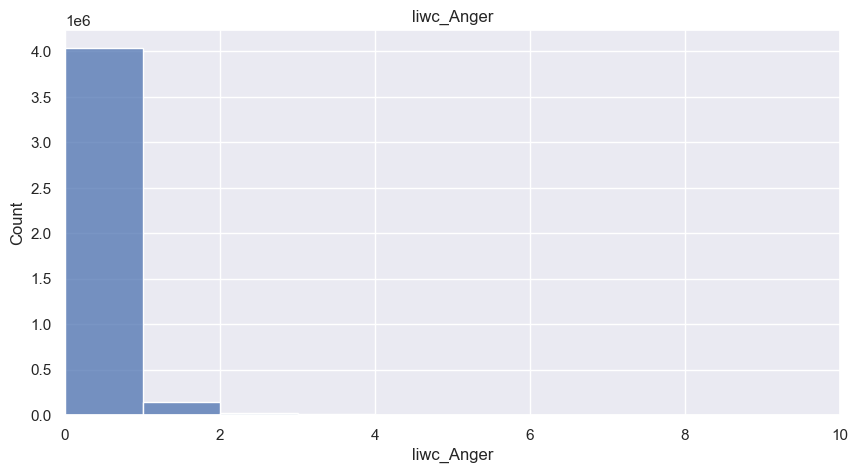

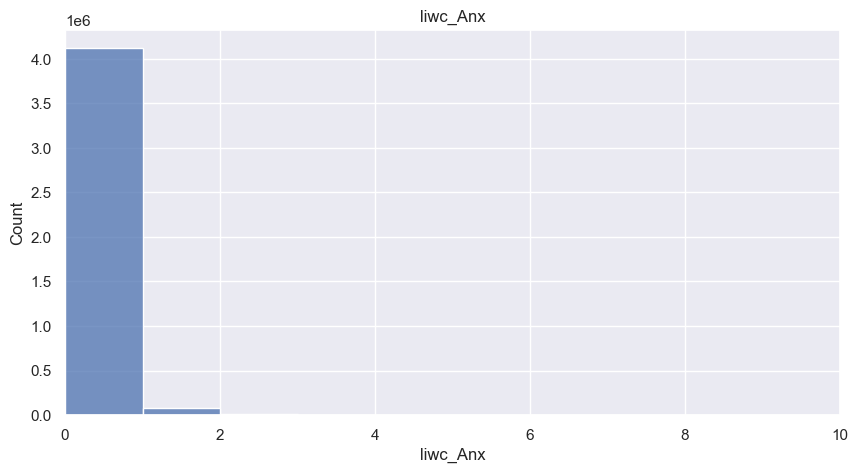

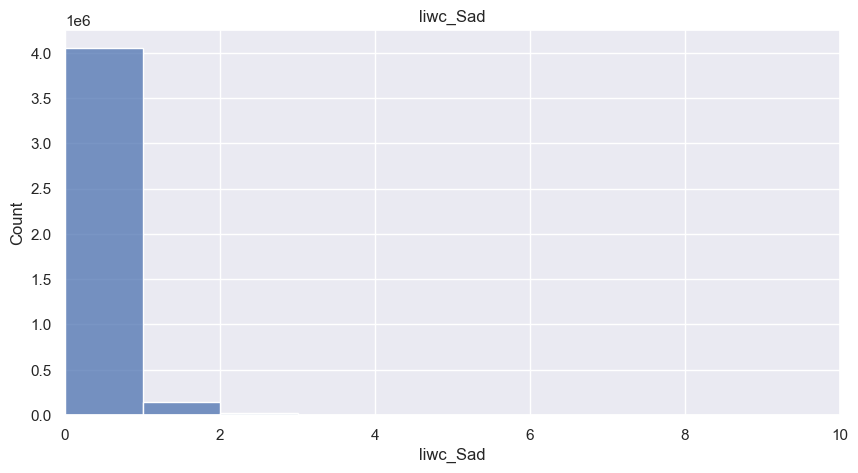

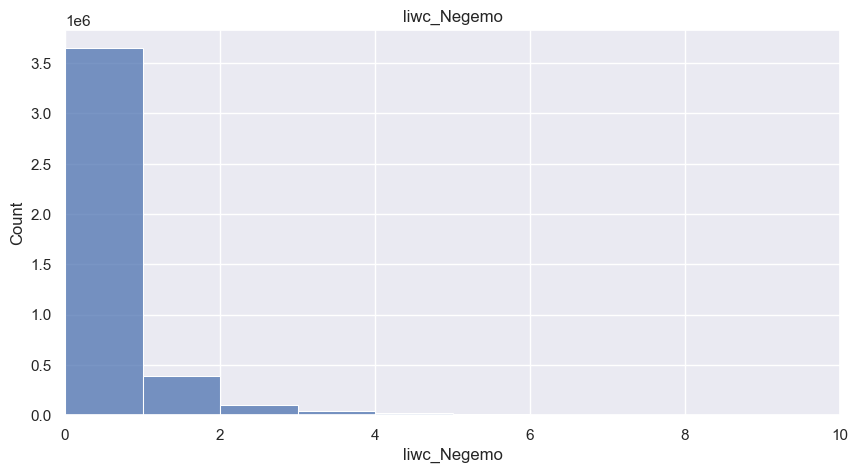

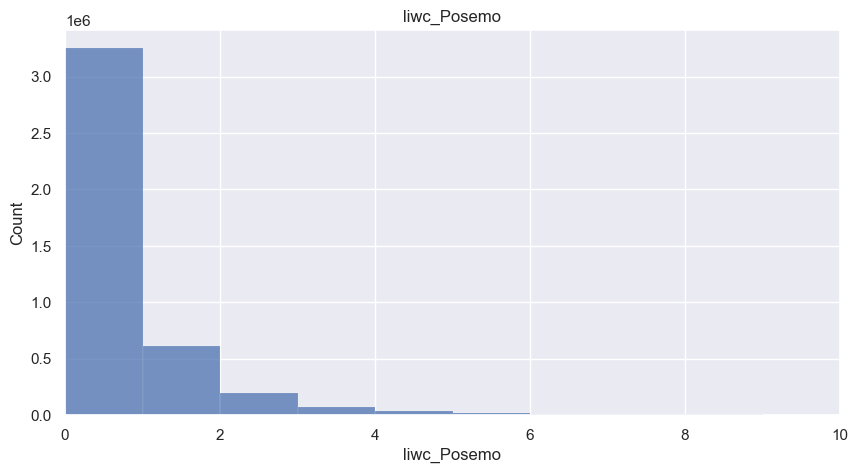

In [30]:
liwc_features = liwc.columns[1:]
for col in ['liwc_Anger', 'liwc_Anx', 'liwc_Sad', 'liwc_Negemo', 'liwc_Posemo']:
    sns.histplot(liwc[col], binwidth=1)
    plt.xlim(0,10)
    plt.title(col)
    plt.show()

In [106]:
liwc.describe().round(0)

liwc_Pronoun     liwc_I    liwc_We  liwc_Self   liwc_You  liwc_Other  \
count     4212872.0  4212872.0  4212872.0  4212872.0  4212872.0   4212872.0   
mean            1.0        0.0        0.0        0.0        0.0         0.0   
std             3.0        1.0        1.0        1.0        1.0         2.0   
min             0.0        0.0        0.0        0.0        0.0         0.0   
25%             0.0        0.0        0.0        0.0        0.0         0.0   
50%             0.0        0.0        0.0        0.0        0.0         0.0   
75%             1.0        0.0        0.0        0.0        0.0         0.0   
max           136.0       91.0       82.0       92.0       82.0        88.0   

       liwc_Negate  liwc_Assent  liwc_Article  liwc_Preps  liwc_Number  \
count    4212872.0    4212872.0     4212872.0   4212872.0    4212872.0   
mean           0.0          0.0           1.0         1.0          0.0   
std            1.0          0.0           4.0         3.0          0.0   
min            0.0          0.0           0.0         0.0          0.0   
25%            0.0          0.0           0.0         0.0          0.0   
50%            0.0          0.0           0.0         0.0          0.0   
75%            0.0          0.0           1.0         1.0          0.0   
max           33.0         22.0         118.0       100.0         35.0   

       liwc_Affect  liwc_Posemo  liwc_Posfeel  liwc_Optim  liwc_Negemo  \
count    4212872.0    4212872.0     4212872.0   4212872.0    4212872.0   
mean           1.0          0.0           0.0         0.0          0.0   
std            2.0          1.0           0.0         0.0          1.0   
min            0.0          0.0           0.0         0.0          0.0   
25%            0.0          0.0           0.0         0.0          0.0   
50%            0.0          0.0           0.0         0.0          0.0   
75%            1.0          0.0           0.0         0.0          0.0   
max          682.0        682.0          39.0        29.0         67.0   

        liwc_Anx  liwc_Anger   liwc_Sad  liwc_Cogmech  liwc_Cause  \
count  4212872.0   4212872.0  4212872.0     4212872.0   4212872.0   
mean         0.0         0.0        0.0           1.0         0.0   
std          0.0         0.0        0.0           3.0         1.0   
min          0.0         0.0        0.0           0.0         0.0   
25%          0.0         0.0        0.0           0.0         0.0   
50%          0.0         0.0        0.0           0.0         0.0   
75%          0.0         0.0        0.0           1.0         0.0   
max         40.0        27.0       32.0         110.0        35.0   

       liwc_Insight  liwc_Discrep  liwc_Inhib  liwc_Tentat  liwc_Certain  \
count     4212872.0     4212872.0   4212872.0    4212872.0     4212872.0   
mean            0.0           0.0         0.0          0.0           0.0   
std             1.0           1.0         0.0          1.0           1.0   
min             0.0           0.0         0.0          0.0           0.0   
25%             0.0           0.0         0.0          0.0           0.0   
50%             0.0           0.0         0.0          0.0           0.0   
75%             0.0           0.0         0.0          0.0           0.0   
max            50.0          54.0        22.0         35.0          56.0   

       liwc_Senses   liwc_See  liwc_Hear  liwc_Feel  liwc_Social  liwc_Comm  \
count    4212872.0  4212872.0  4212872.0  4212872.0    4212872.0  4212872.0   
mean           0.0        0.0        0.0        0.0          1.0        0.0   
std            0.0        0.0        0.0        0.0          3.0        1.0   
min            0.0        0.0        0.0        0.0          0.0        0.0   
25%            0.0        0.0        0.0        0.0          0.0        0.0   
50%            0.0        0.0        0.0        0.0          0.0        0.0   
75%            0.0        0.0        0.0        0.0          1.0        0.0   
max          270.0    

In [107]:
liwc[liwc['liwc_Negemo'] == 67] # message printed out further below

UID_key  liwc_Pronoun  liwc_I  liwc_We  liwc_Self  \
762320  2580143869444217863415830            16       3        0          3   

        liwc_You  liwc_Other  liwc_Negate  liwc_Assent  liwc_Article  \
762320         2          12            1            0            49   

        liwc_Preps  liwc_Number  liwc_Affect  liwc_Posemo  liwc_Posfeel  \
762320          28            0           70            3             0   

        liwc_Optim  liwc_Negemo  liwc_Anx  liwc_Anger  liwc_Sad  liwc_Cogmech  \
762320           1           67         2           2         1            59   

        liwc_Cause  liwc_Insight  liwc_Discrep  liwc_Inhib  liwc_Tentat  \
762320           0             7            14           6            4   

        liwc_Certain  liwc_Senses  liwc_See  liwc_Hear  liwc_Feel  \
762320            30           30         9          0         20   

        liwc_Social  liwc_Comm  liwc_Othref  liwc_Friends  liwc_Family  \
762320           20          5           32             0            0   

        liwc_Humans  liwc_Time  liwc_Past  liwc_Present  liwc_Future  \
762320            0         17         14            23            2   

        liwc_Space  liwc_Up  liwc_Down  liwc_Incl  liwc_Excl  liwc_Motion  \
762320          23        9          0         22          0            2   

        liwc_Occup  liwc_School  liwc_Job  liwc_Achieve  liwc_Leisure  \
762320           6            2         3             2             9   

        liwc_Home  liwc_Sports  liwc_TV  liwc_Music  liwc_Money  liwc_Metaph  \
762320          0            0        9           0           4            0   

        liwc_Relig  liwc_Death  liwc_Physcal  liwc_Body  liwc_Sexual  \
762320           0           2            21         20            0   

        liwc_Eating  liwc_Sleep  liwc_Groom  liwc_Swear  liwc_Nonfl  \
762320            1           0           0           0           0   

        liwc_Fillers  
762320             0

In [145]:
liwc[liwc['liwc_Affect'] == 682]['UID_key'] # message printed out further below

66240    101435-6408240263544091615
66244    101440-6408240263544091615
66245    101441-6408240263544091615
66246    101442-6408240263544091615
Name: UID_key, dtype: object

# Merging and Aggregating

In [5]:
data = pd.read_csv('../data/samples/messages_sample_full.csv.gzip', compression='gzip').drop('Unnamed: 0', axis=1)
#only keep messages from 100 authors with most messages
data = data[data['author'].isin(data['author'].value_counts().head(100).index)]

In [6]:
#concat liwc and data based on UID_key
merged = data.merge(liwc, on='UID_key', how='inner')
merged = merged.dropna(subset=['final_message_string']) #not necessary if sample of authors is taken

In [7]:
#aggregate features based for each author
grouped = merged.drop(['UID_key', 'group_or_channel', 'final_message'], axis = 1)
#drop columns
agg_dict = {col: 'sum' for col in liwc_features}
agg_dict['final_message_string'] = ' '.join

grouped = grouped.groupby('author').agg(agg_dict)

In [8]:
grouped.head(5)

liwc_Pronoun  liwc_I  liwc_We  liwc_Self  liwc_You  liwc_Other  \
author                                                                          
-9.156478e+18         15471    4182     1556       5738      6035        4067   
-9.116666e+18          2705     822      328       1150       354        1303   
-9.029508e+18         42359   13684     3305      16989     12613       13087   
-8.924470e+18          2286     965      255       1220       374         763   
-8.315076e+18          4950    2020      551       2571       904        1470   

               liwc_Negate  liwc_Assent  liwc_Article  liwc_Preps  \
author                                                              
-9.156478e+18         4207         1389         16723       13626   
-9.116666e+18          601          113          3769        3209   
-9.029508e+18         5552         2885         29178       20638   
-8.924470e+18          673          325          2259        1633   
-8.315076e+18         1360          948          4364        2892   

               liwc_Number  liwc_Affect  liwc_Posemo  liwc_Posfeel  \
author                                                               
-9.156478e+18          671         8556         5195           288   
-9.116666e+18          150         2107         1095           112   
-9.029508e+18          991        17999        13046           852   
-8.924470e+18           66         1617         1082            77   
-8.315076e+18          136         2434         1691           102   

               liwc_Optim  liwc_Negemo  liwc_Anx  liwc_Anger  liwc_Sad  \
author                                                                   
-9.156478e+18        1100         3345       260         745       642   
-9.116666e+18         282         1007       143         303       161   
-9.029508e+18        3137         4953       716        1100       844   
-8.924470e+18         195          535        59         151        92   
-8.315076e+18         456          743        98         161       204   

               liwc_Cogmech  liwc_Cause  liwc_Insight  liwc_Discrep  \
author                                                                
-9.156478e+18         18133        3734          5109          4148   
-9.116666e+18          3500         532           870           537   
-9.029508e+18         41532        7091         11561          7845   
-8.924470e+18          2385         397           610           452   
-8.315076e+18          5138         870          1238          1078   

               liwc_Inhib  liwc_Tentat  liwc_Certain  liwc_Senses  liwc_See  \
author                                                                        
-9.156478e+18         653         2154          3476          359       165   
-9.116666e+18         174          600           997           58        31   
-9.029508e+18        1430         4334         12061          647       163   
-8.924470e+18          91          203           728           94        30   
-8.315076e+18         107          517          1596          130        61   

               liwc_Hear  liwc_Feel  liwc_Social  liwc_Comm  liwc_Othref  \
author                                                                     
-9.156478e+18        131         28        16219       2936        12060   
-9.116666e+18         13         12         2814        622         2174   
-9.029508e+18        417         26        38409       6559        31899   
-8.924470e+18         38          4         2084        430         1606   
-8.315076e+18         45          4         3973        750         3517   

               liwc_Friends  liwc_Family  liwc_Humans  liwc_Time  liwc_Past  \
author                                                                        
-9.156478e+18           238          522         1468       6787       4306   
-9.116666e+18            44           82          243       1744        799   
-9.029508e+18           195         1327         237

# Distribution of LIWC2007 Categories (Counts)

In [9]:
grouped.describe()

liwc_Pronoun       liwc_I       liwc_We     liwc_Self      liwc_You  \
count     100.000000    100.00000    100.000000    100.000000    100.000000   
mean    13413.100000   3103.79000   1743.600000   4847.390000   3412.620000   
std     24918.470923   5141.13552   3903.918601   8207.486475   7821.416842   
min       107.000000     35.00000      3.000000     45.000000     21.000000   
25%      2669.750000    855.00000    230.250000   1241.000000    581.750000   
50%      6565.000000   1792.50000    589.000000   2542.500000   1501.000000   
75%     11726.500000   3512.50000   1176.250000   5056.250000   2545.000000   
max    161786.000000  43692.00000  24930.000000  56236.000000  62821.000000   

          liwc_Other   liwc_Negate  liwc_Assent   liwc_Article     liwc_Preps  \
count     100.000000    100.000000   100.000000     100.000000     100.000000   
mean     6223.110000   2996.810000   724.210000   18666.310000   16345.510000   
std     14182.960518   5424.127266  1100.507048   50599.800259   46144.581776   
min        49.000000     32.000000     7.000000      72.000000      69.000000   
25%      1121.750000    672.250000   206.250000    2835.750000    2472.500000   
50%      2428.500000   1604.000000   480.000000    6512.000000    5434.500000   
75%      4627.500000   2858.750000   813.000000   12394.750000   10263.500000   
max    101945.000000  38490.000000  8729.000000  435017.000000  395083.000000   

        liwc_Number    liwc_Affect   liwc_Posemo  liwc_Posfeel    liwc_Optim  \
count    100.000000     100.000000    100.000000    100.000000    100.000000   
mean     823.210000    9092.320000   5767.270000    502.090000   1340.300000   
std     2680.630264   20280.257644  12132.247422   1379.707099   3006.917118   
min        0.000000      43.000000     34.000000      0.000000      8.000000   
25%       99.000000    1776.250000   1138.000000     79.250000    217.750000   
50%      247.000000    4031.500000   2804.500000    195.000000    560.000000   
75%      503.250000    6882.250000   4827.500000    366.750000    991.500000   
max    25194.000000  157459.000000  90553.000000  12611.000000  23124.000000   

        liwc_Negemo     liwc_Anx    liwc_Anger      liwc_Sad   liwc_Cogmech  \
count    100.000000   100.000000    100.000000    100.000000     100.000000   
mean    3313.890000   413.250000    941.990000    622.370000   16395.360000   
std     8169.572529  1124.264576   2504.259585   1390.452703   36020.187205   
min        9.000000     2.000000      1.000000      4.000000      82.000000   
25%      609.250000    69.750000    141.250000    116.750000    3214.500000   
50%     1192.000000   139.500000    266.500000    260.000000    7280.500000   
75%     2387.250000   290.500000    536.750000    517.750000   12608.750000   
max    66773.000000  9999.000000  18623.000000  10838.000000  264262.000000   

         liwc_Cause  liwc_Insight  liwc_Discrep    liwc_Inhib   liwc_Tentat  \
count    100.000000    100.000000    100.000000    100.000000    100.000000   
mean    2764.870000   4299.670000   2813.340000   1026.470000   2000.610000   
std     6282.981816   9453.312632   5383.955816   3036.340738   4474.701965   
min       11.000000     40.000000      7.000000      6.000000     11.000000   
25%      497.750000    844.250000    540.000000    110.750000    350.000000   
50%     1241.500000   1896.000000   1416.000000    246.000000    834.000000   
75%     2082.000000   3335.750000   2699.750000    666.500000   1632.000000   
max    45505.000000  76671.000000  41705.000000  25472.000000  35085.000000   

       liwc_Certain  liwc_Senses     liwc_See    liwc_Hear   liwc_Feel  \
count    100.000000   100.000000   100.000000   100.000000  100.000000   
mean    4300.630000   448.030000   242.580000   123.060000   24.870000   
std    10328.314546  1015.679674   701.952604   197.593135   57.465432   
min       13.000000     4.000000     4.000000     0.000000    0.000000   
25%      737.000000    85.500000    29.000000    26

# Correlation Analysis (Ratios)

## Convert Counts to Ratios

In [11]:
#count words in 'final_message' for each author
grouped['word_count']=grouped['final_message_string'].apply(lambda x: len(re.findall(r'\w+', x)) if x != '' else 0)
#convert counts to ratios
for col in liwc_features:
    grouped[col] = (grouped[col]/grouped['word_count']).round(4)

In [12]:
grouped.head(5)

liwc_Pronoun  liwc_I  liwc_We  liwc_Self  liwc_You  liwc_Other  \
author                                                                          
-9.156478e+18        0.0781  0.0211   0.0079     0.0290    0.0305      0.0205   
-9.116666e+18        0.0666  0.0202   0.0081     0.0283    0.0087      0.0321   
-9.029508e+18        0.1195  0.0386   0.0093     0.0479    0.0356      0.0369   
-8.924470e+18        0.0873  0.0369   0.0097     0.0466    0.0143      0.0291   
-8.315076e+18        0.0999  0.0408   0.0111     0.0519    0.0182      0.0297   

               liwc_Negate  liwc_Assent  liwc_Article  liwc_Preps  \
author                                                              
-9.156478e+18       0.0212       0.0070        0.0844      0.0688   
-9.116666e+18       0.0148       0.0028        0.0928      0.0790   
-9.029508e+18       0.0157       0.0081        0.0823      0.0582   
-8.924470e+18       0.0257       0.0124        0.0863      0.0624   
-8.315076e+18       0.0274       0.0191        0.0881      0.0584   

               liwc_Number  liwc_Affect  liwc_Posemo  liwc_Posfeel  \
author                                                               
-9.156478e+18       0.0034       0.0432       0.0262        0.0015   
-9.116666e+18       0.0037       0.0519       0.0270        0.0028   
-9.029508e+18       0.0028       0.0508       0.0368        0.0024   
-8.924470e+18       0.0025       0.0618       0.0413        0.0029   
-8.315076e+18       0.0027       0.0491       0.0341        0.0021   

               liwc_Optim  liwc_Negemo  liwc_Anx  liwc_Anger  liwc_Sad  \
author                                                                   
-9.156478e+18      0.0056       0.0169    0.0013      0.0038    0.0032   
-9.116666e+18      0.0069       0.0248    0.0035      0.0075    0.0040   
-9.029508e+18      0.0089       0.0140    0.0020      0.0031    0.0024   
-8.924470e+18      0.0074       0.0204    0.0023      0.0058    0.0035   
-8.315076e+18      0.0092       0.0150    0.0020      0.0032    0.0041   

               liwc_Cogmech  liwc_Cause  liwc_Insight  liwc_Discrep  \
author                                                                
-9.156478e+18        0.0915      0.0188        0.0258        0.0209   
-9.116666e+18        0.0862      0.0131        0.0214        0.0132   
-9.029508e+18        0.1172      0.0200        0.0326        0.0221   
-8.924470e+18        0.0911      0.0152        0.0233        0.0173   
-8.315076e+18        0.1037      0.0176        0.0250        0.0218   

               liwc_Inhib  liwc_Tentat  liwc_Certain  liwc_Senses  liwc_See  \
author                                                                        
-9.156478e+18      0.0033       0.0109        0.0175       0.0018    0.0008   
-9.116666e+18      0.0043       0.0148        0.0245       0.0014    0.0008   
-9.029508e+18      0.0040       0.0122        0.0340       0.0018    0.0005   
-8.924470e+18      0.0035       0.0078        0.0278       0.0036    0.0011   
-8.315076e+18      0.0022       0.0104        0.0322       0.0026    0.0012   

               liwc_Hear  liwc_Feel  liwc_Social  liwc_Comm  liwc_Othref  \
author                                                                     
-9.156478e+18     0.0007     0.0001       0.0818     0.0148       0.0608   
-9.116666e+18     0.0003     0.0003       0.0693     0.0153       0.0535   
-9.029508e+18     0.0012     0.0001       0.1084     0.0185       0.0900   
-8.924470e+18     0.0015     0.0002       0.0796     0.0164       0.0613   
-8.315076e+18     0.0009     0.0001       0.0802     0.0151       0.0710   

               liwc_Friends  liwc_Family  liwc_Humans  liwc_Time  liwc_Past  \
author                                                                        
-9.156478e+18        0.0012       0.0026       0.0074     0.0342     0.0217   
-9.116666e+18        0.0011       0.0020       0.0060     0.0429     0.0197   
-9.029508e+18        0.0006       0.0037       0.006

In [37]:
corr = grouped.drop(['final_message_string', 'word_count'], axis=1).corr()

## Distribution of Ratios

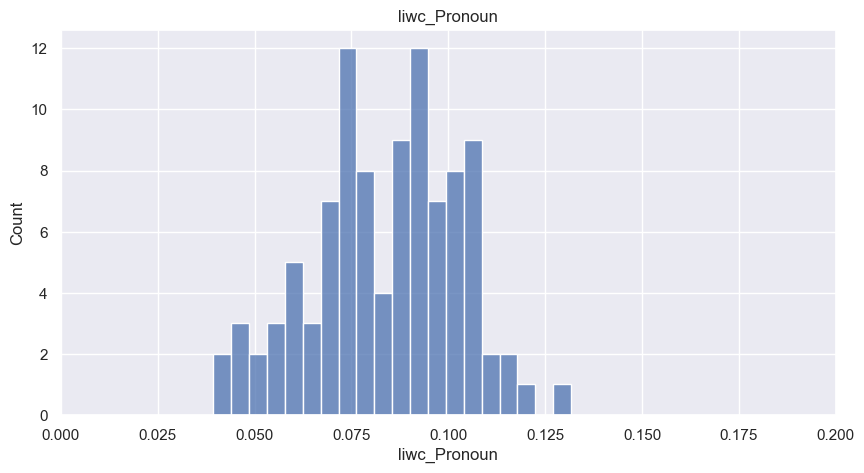

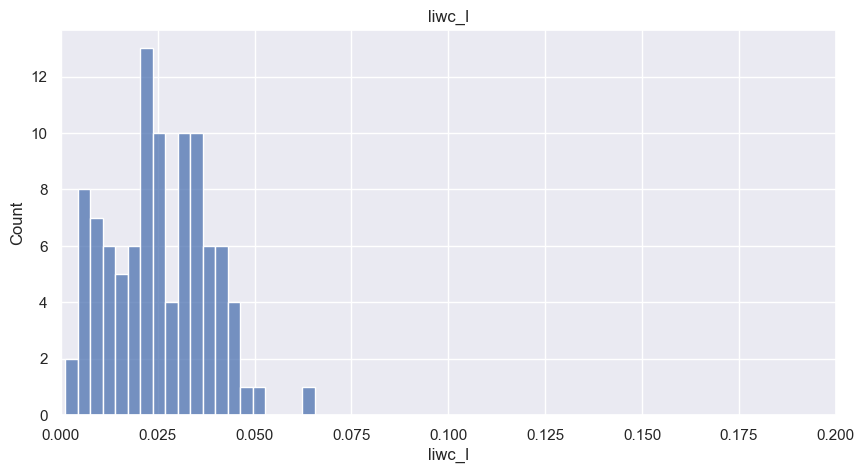

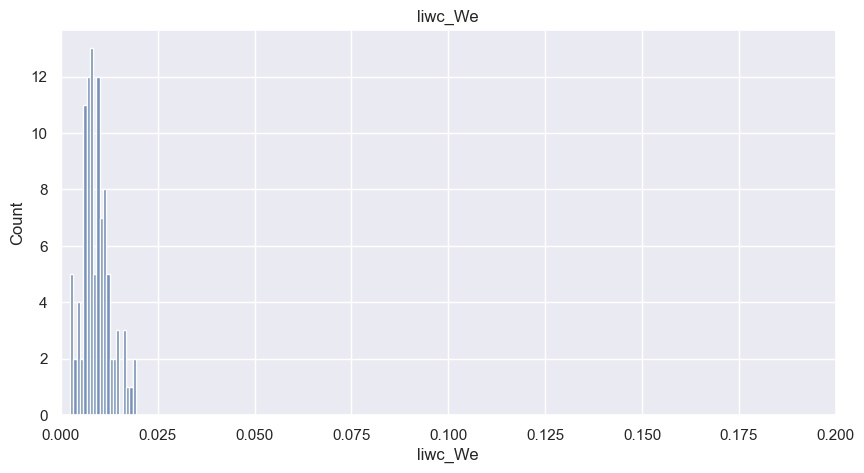

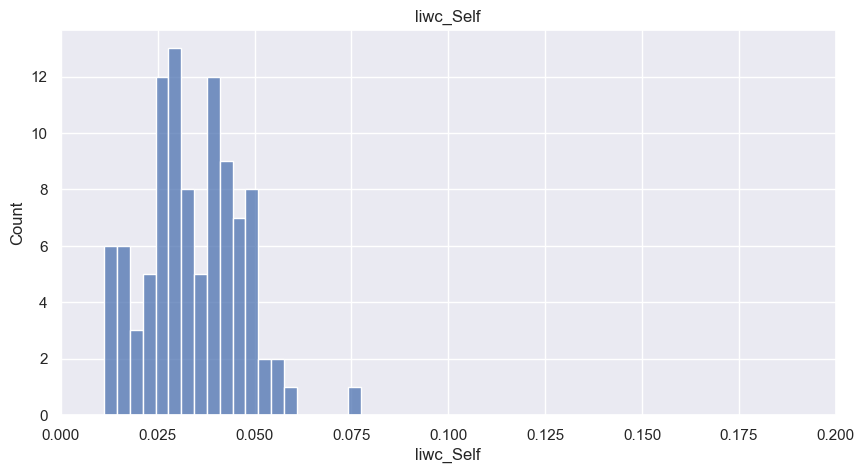

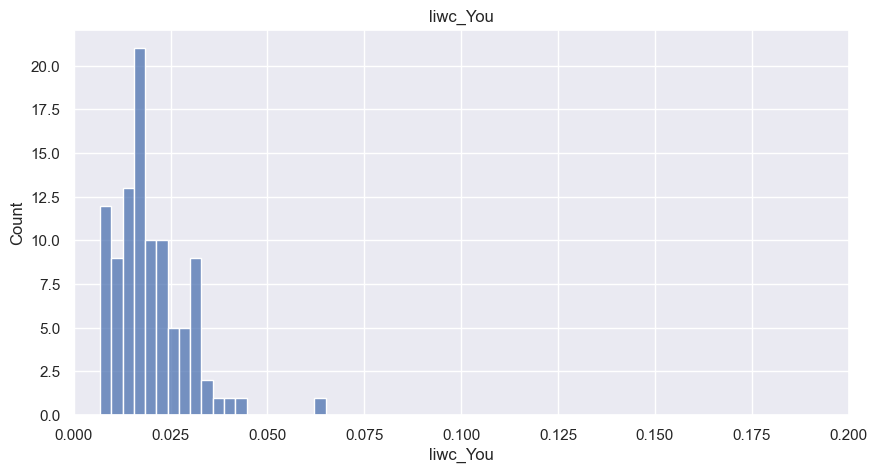

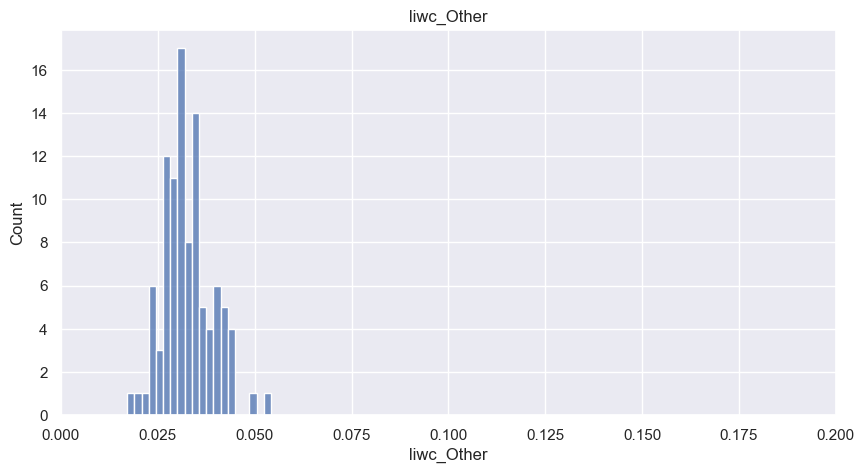

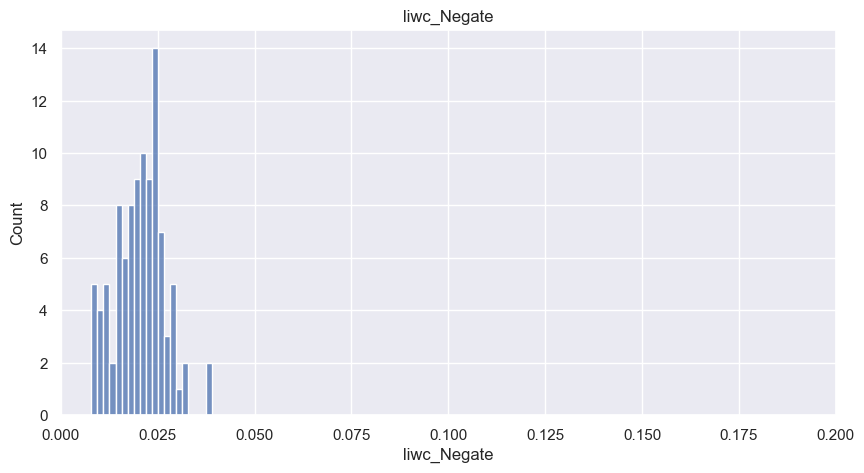

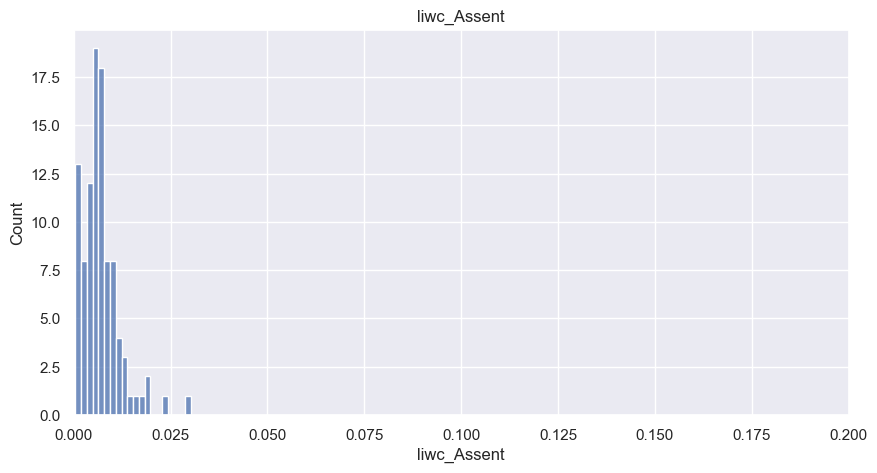

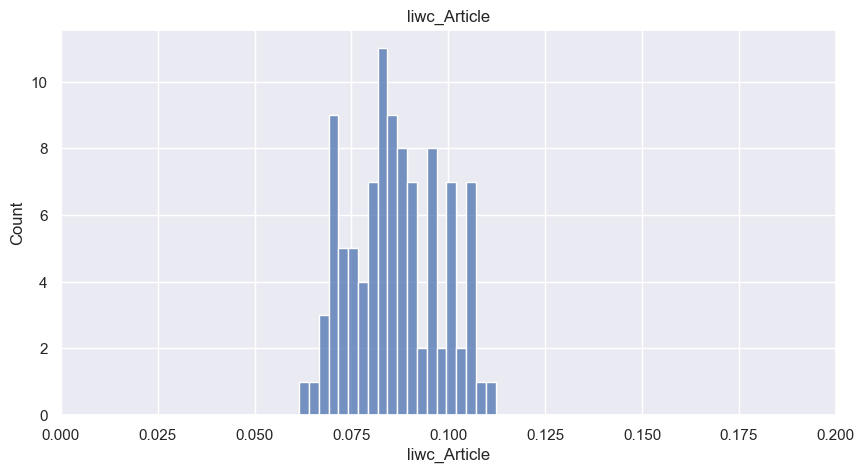

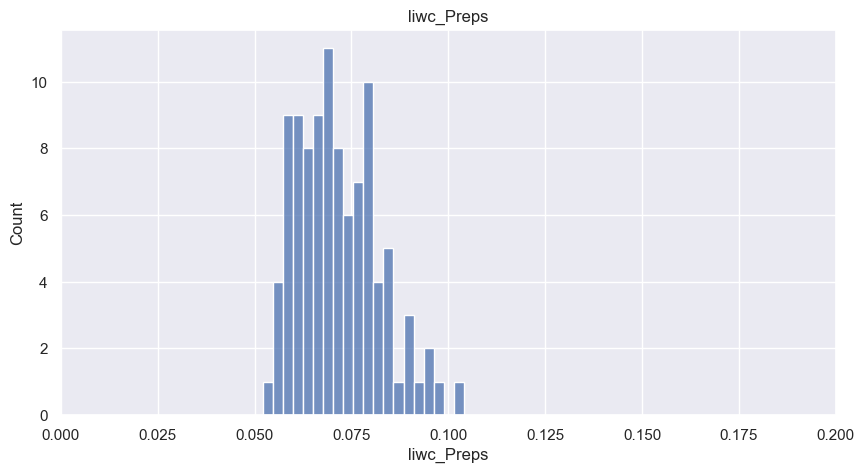

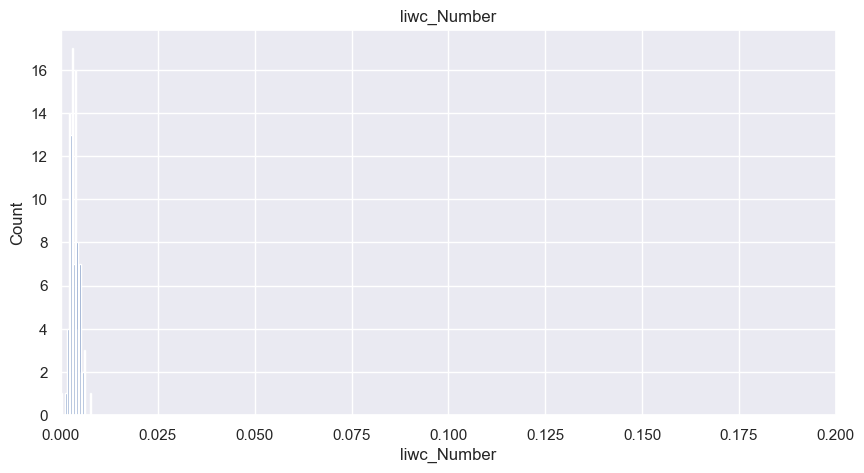

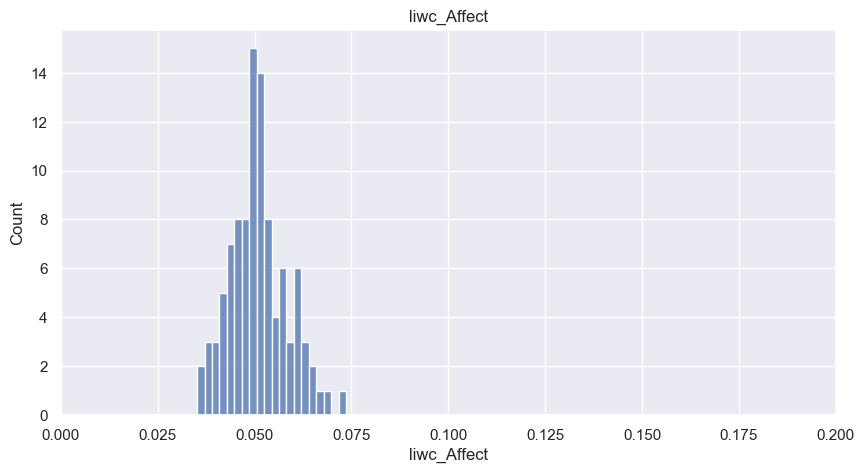

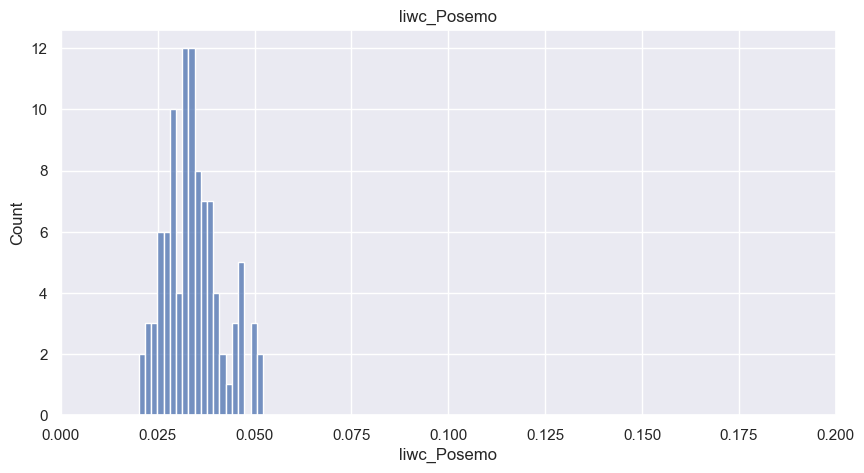

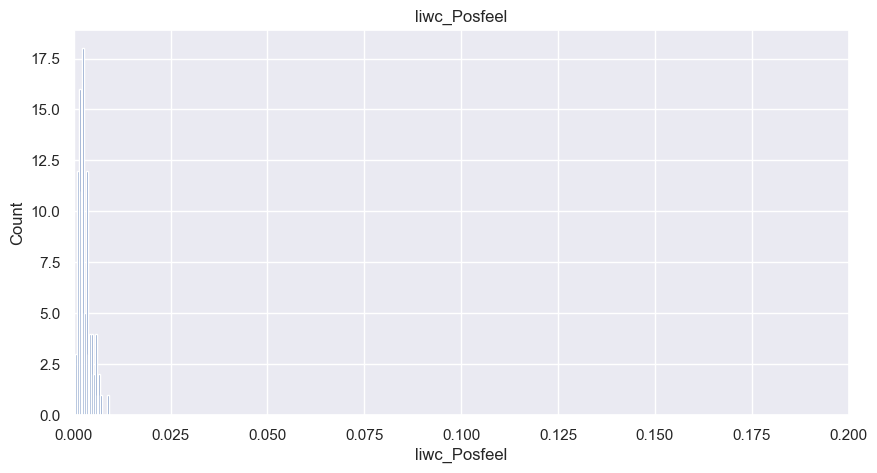

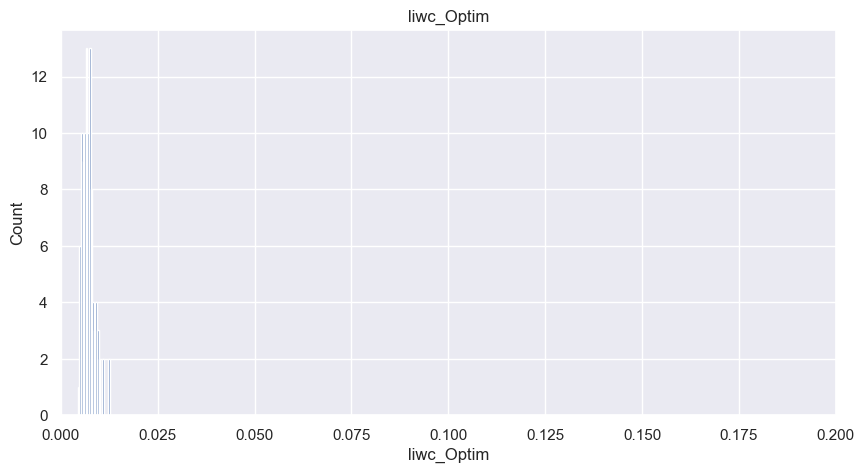

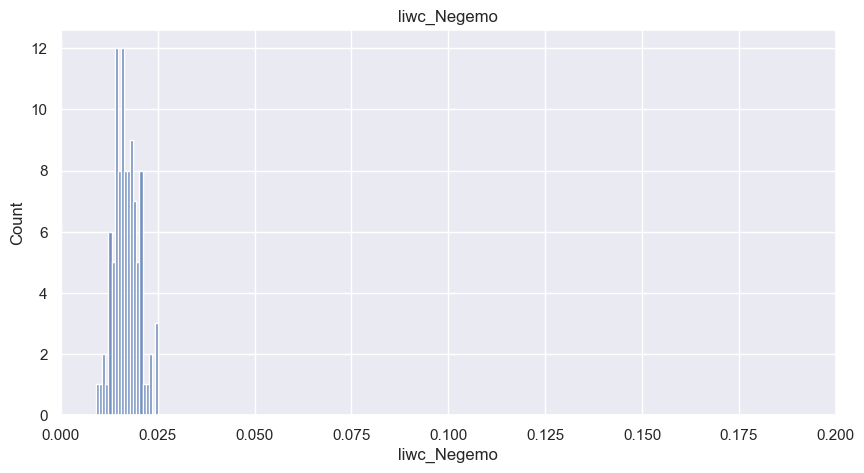

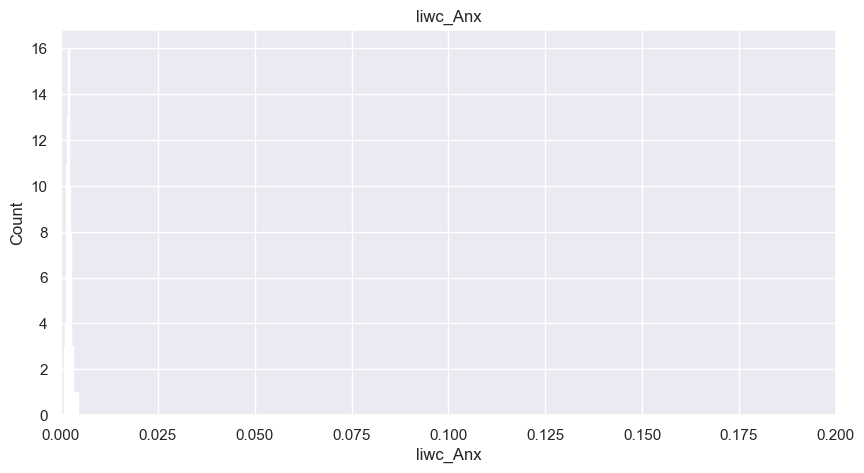

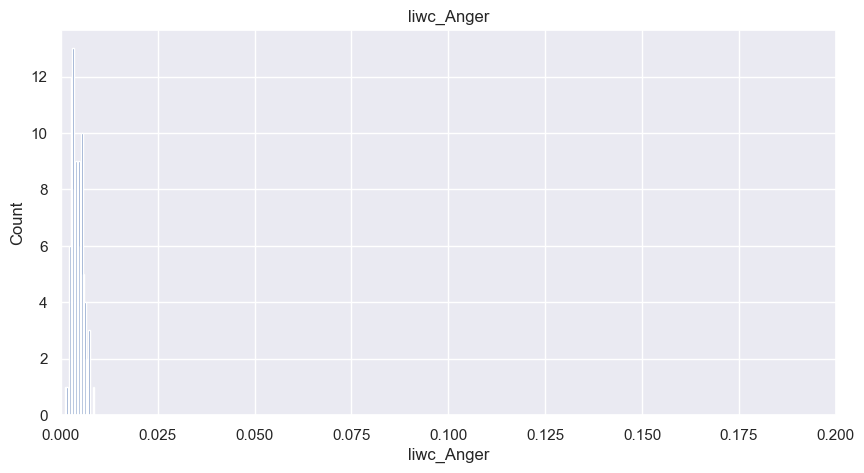

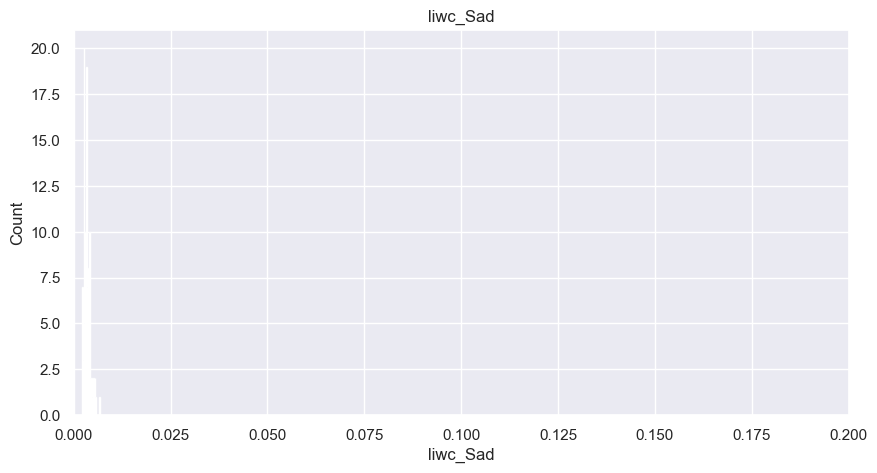

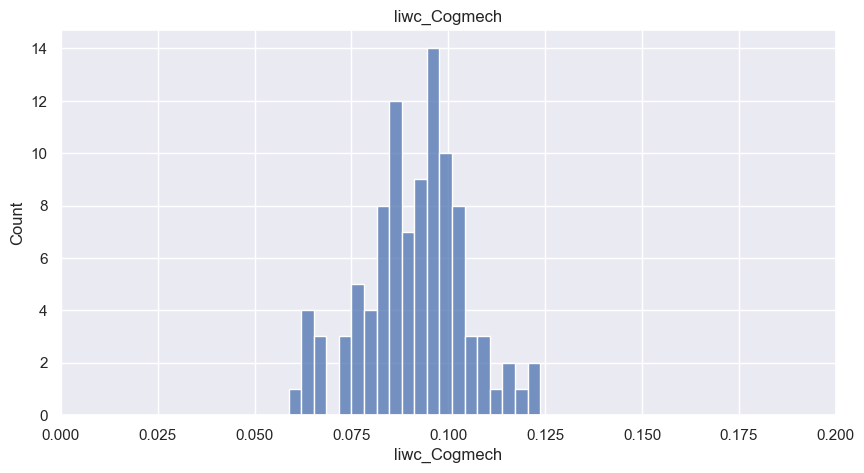

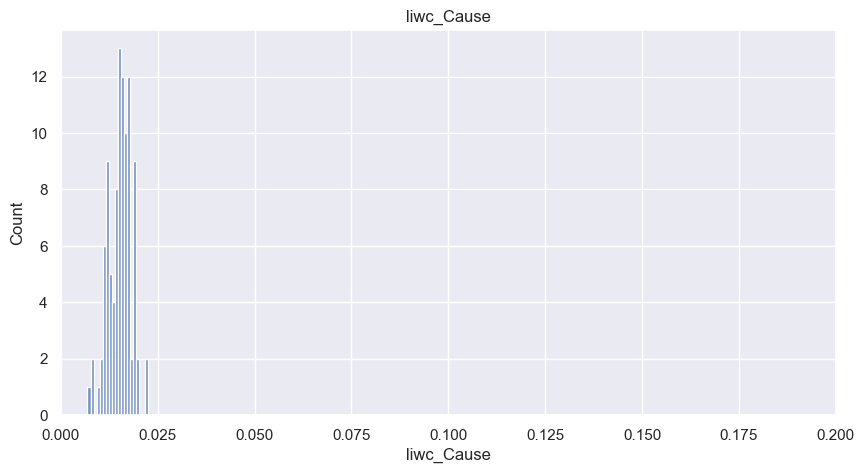

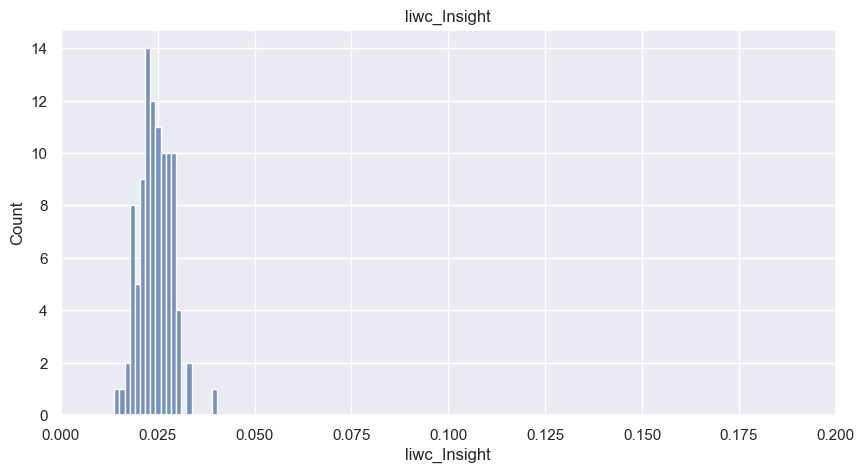

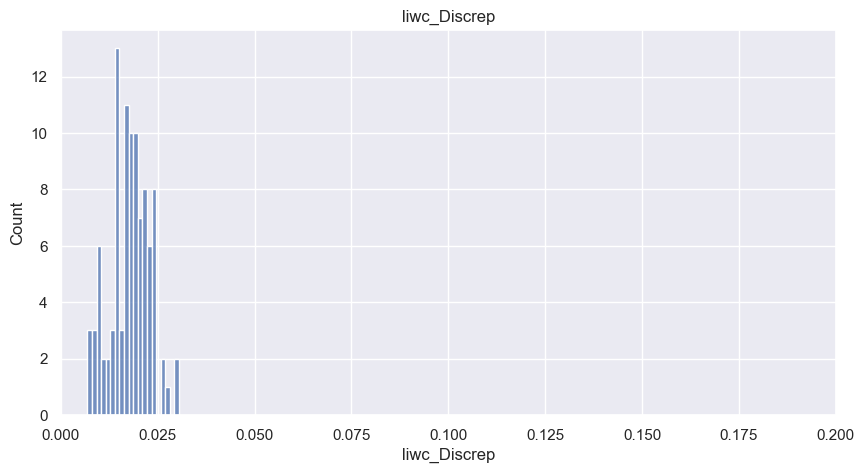

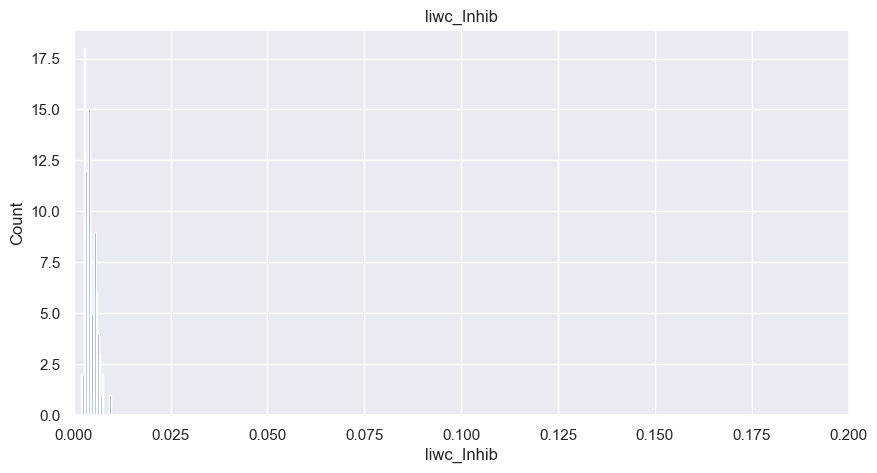

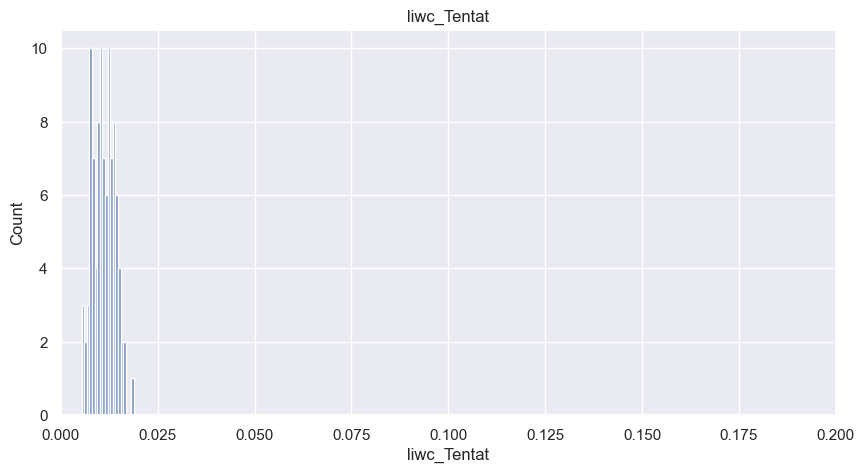

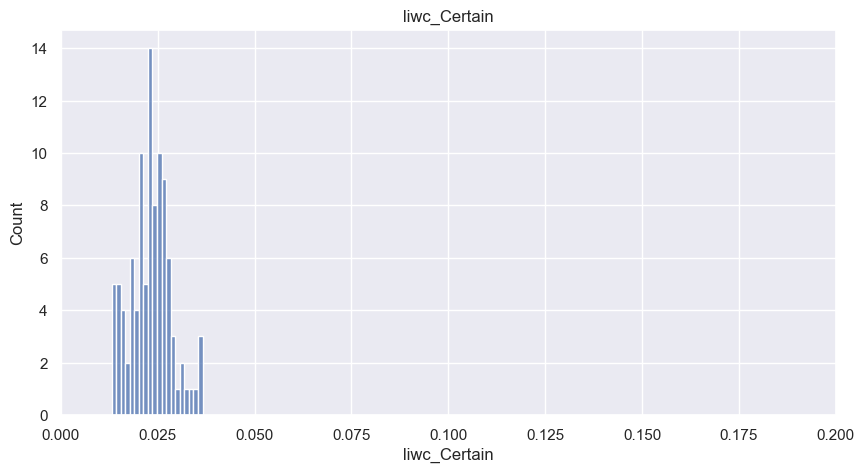

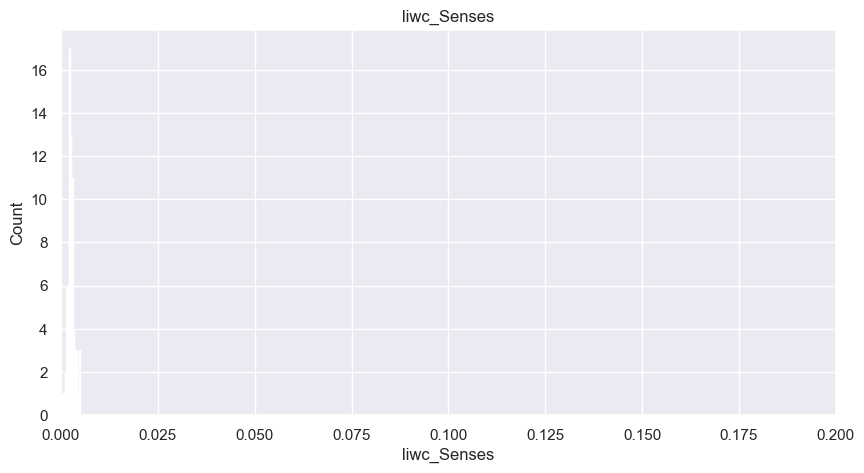

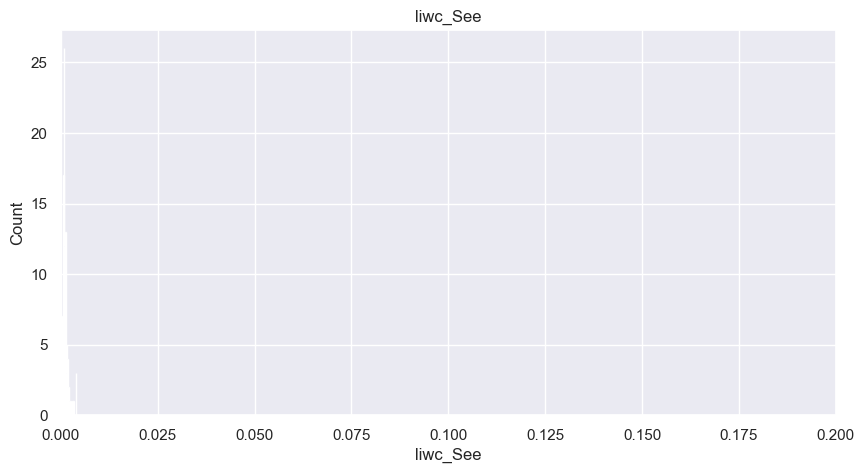

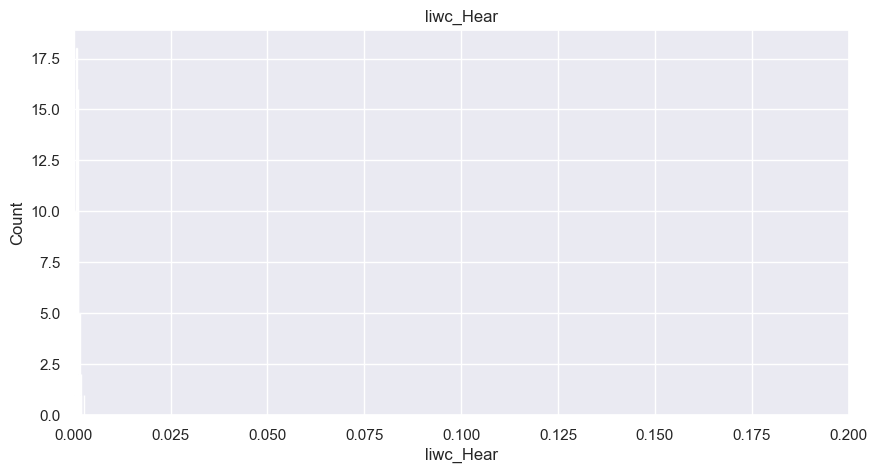

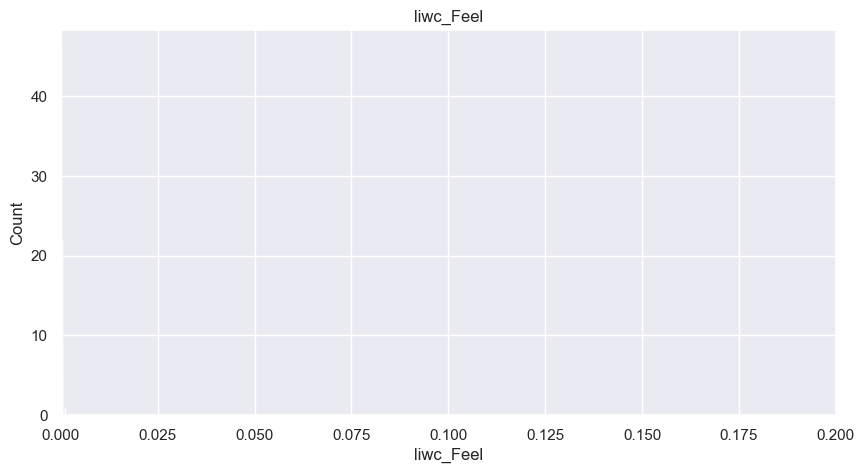

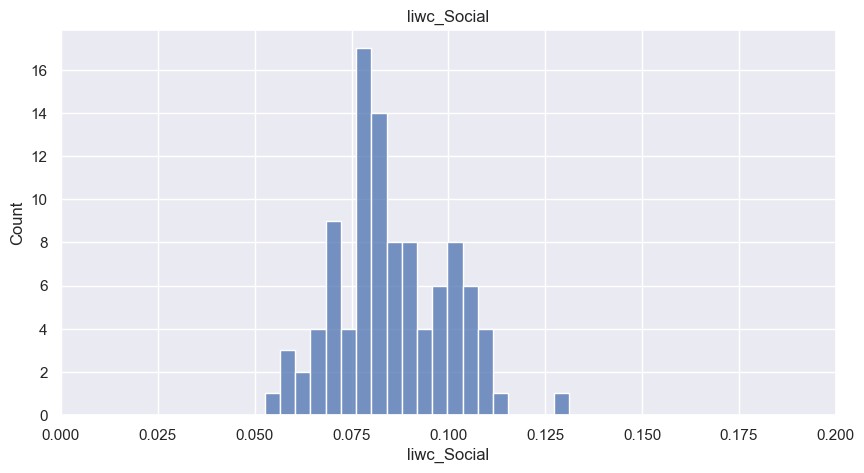

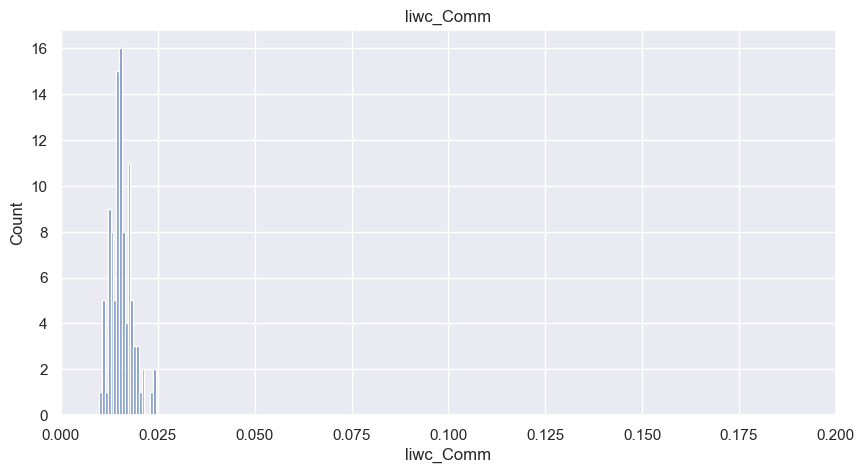

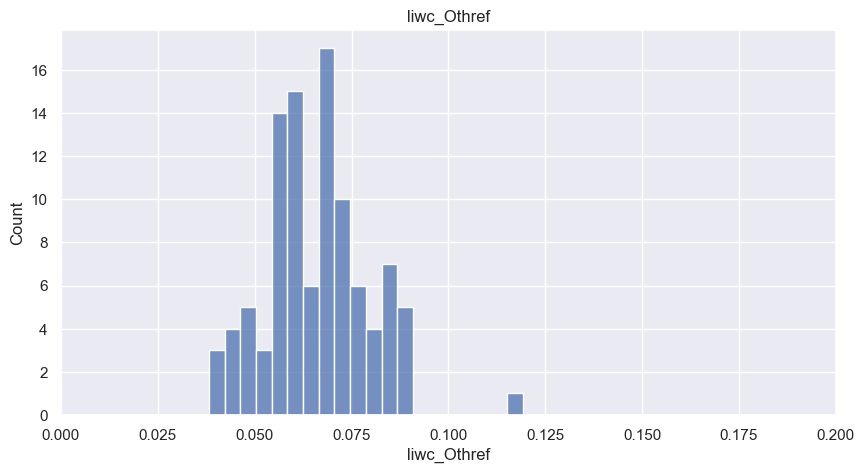

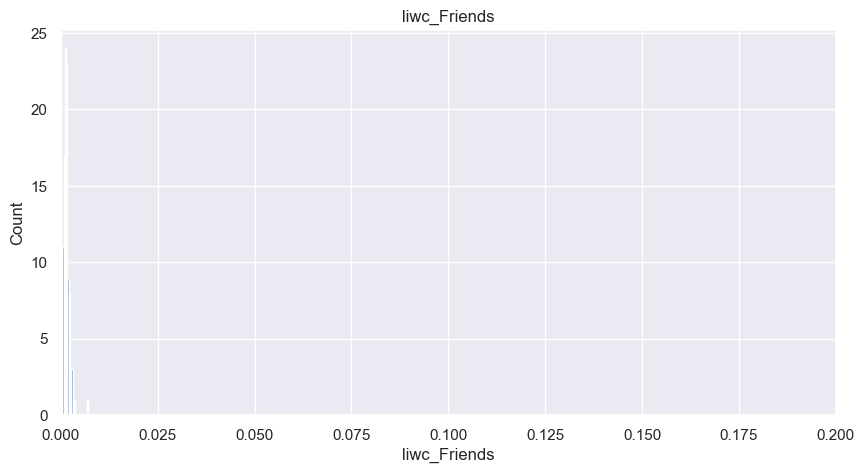

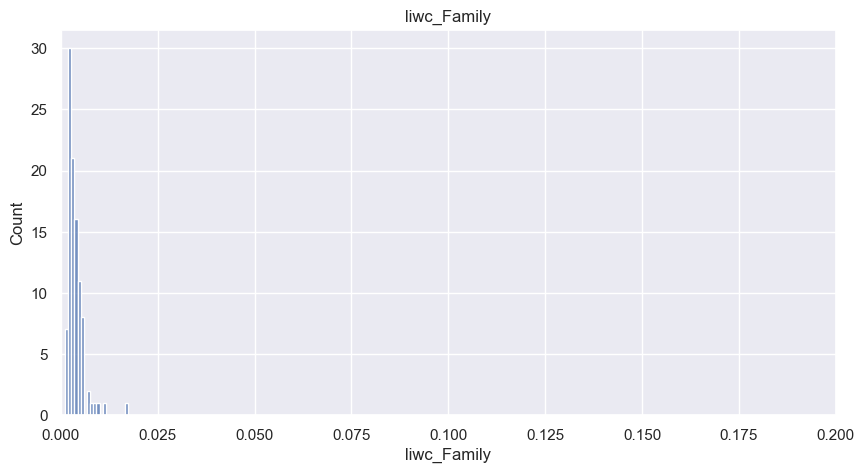

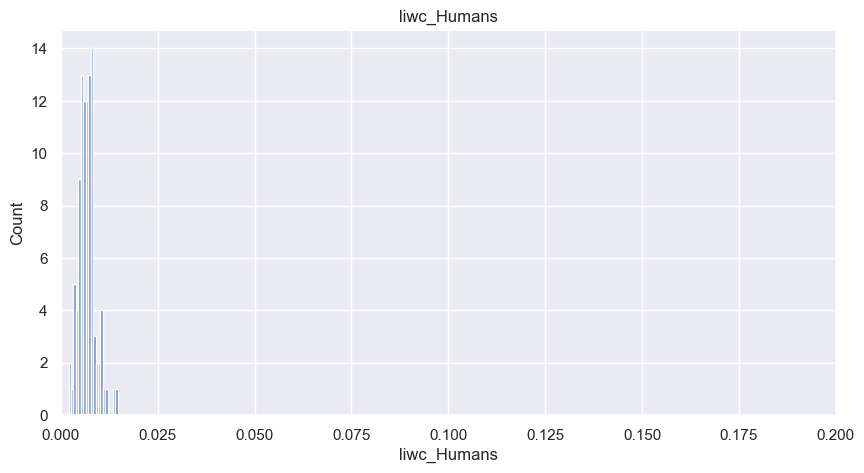

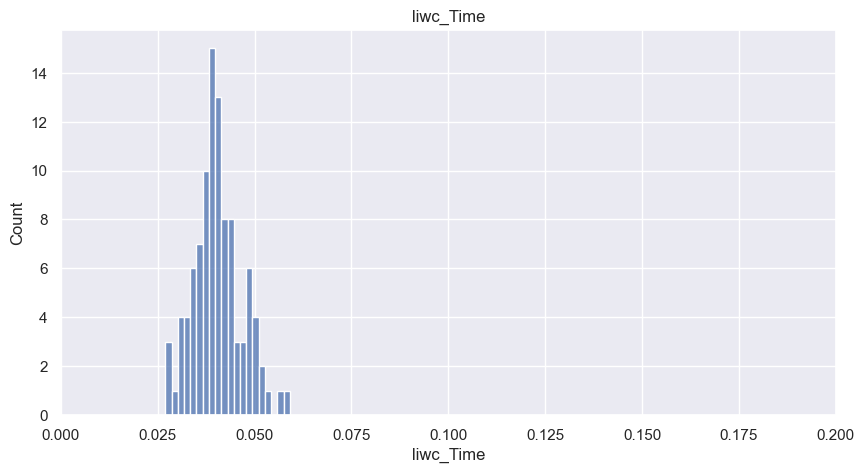

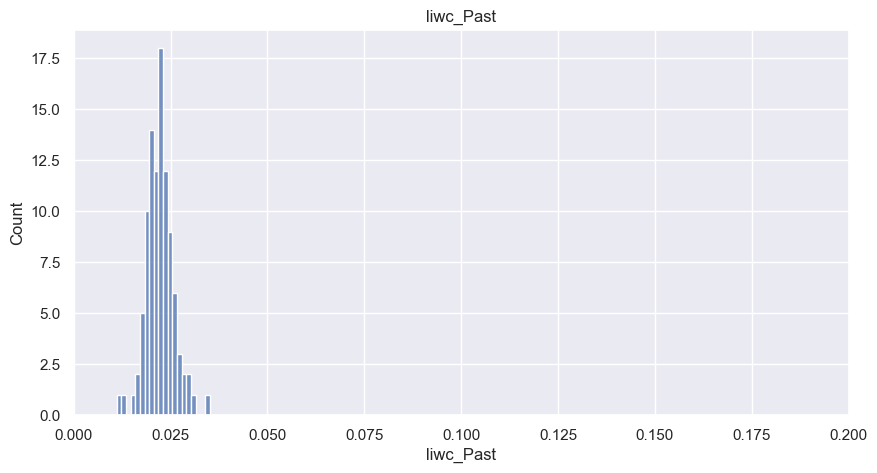

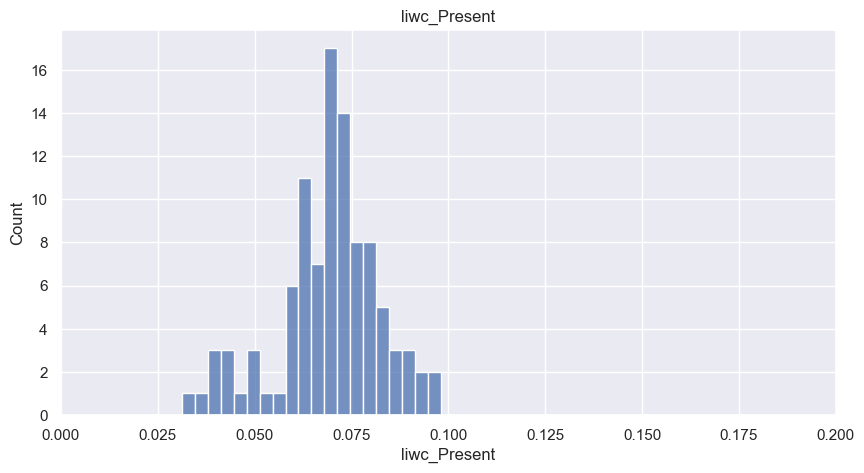

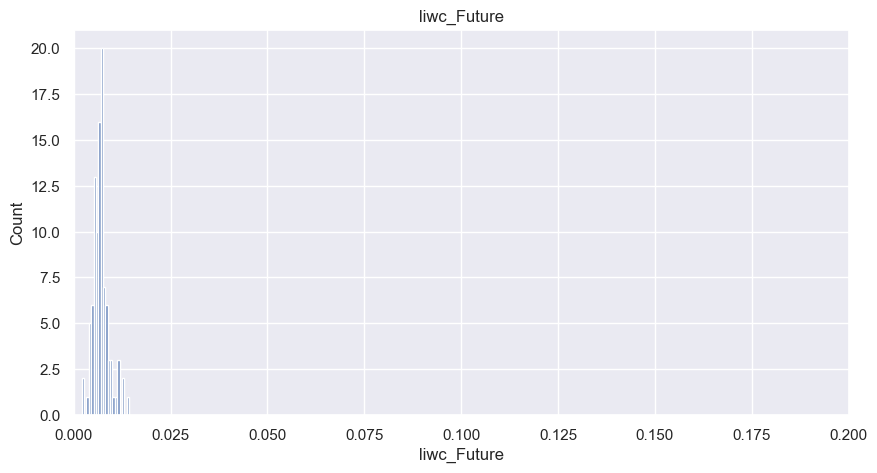

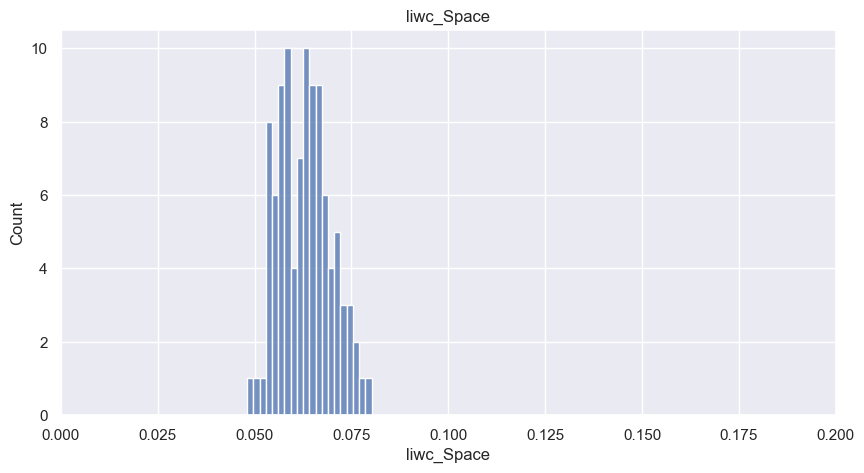

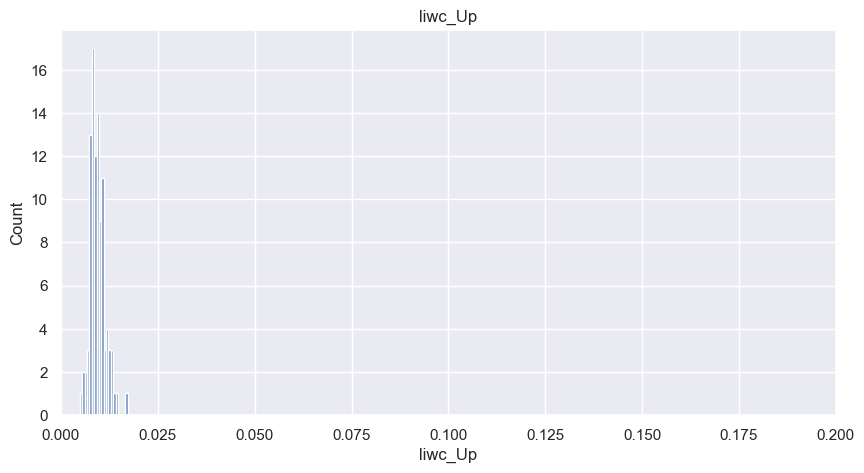

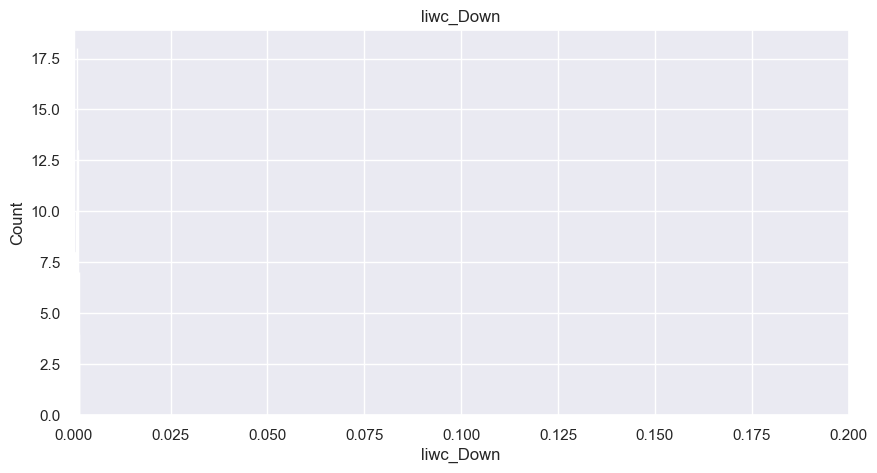

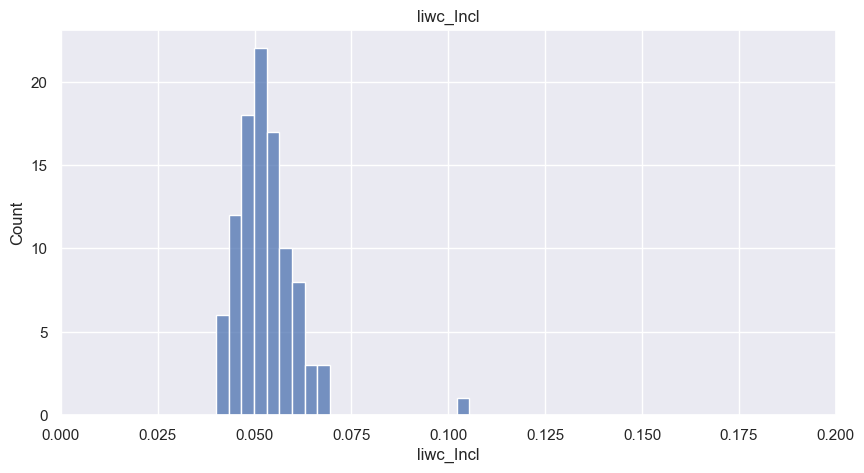

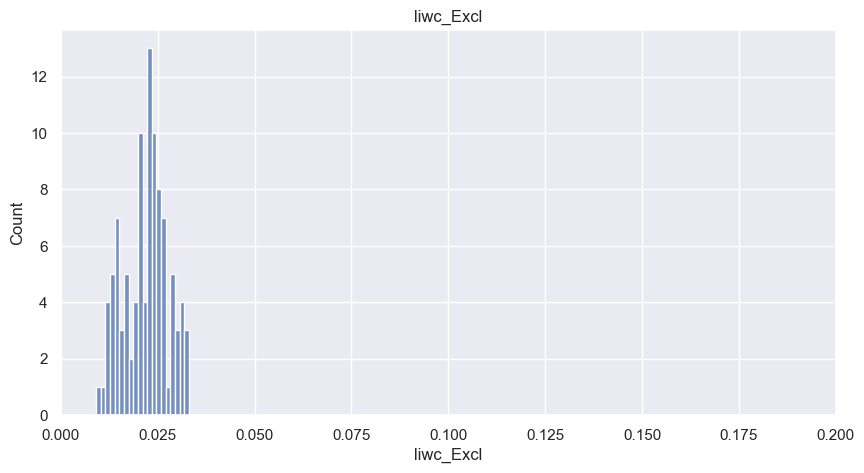

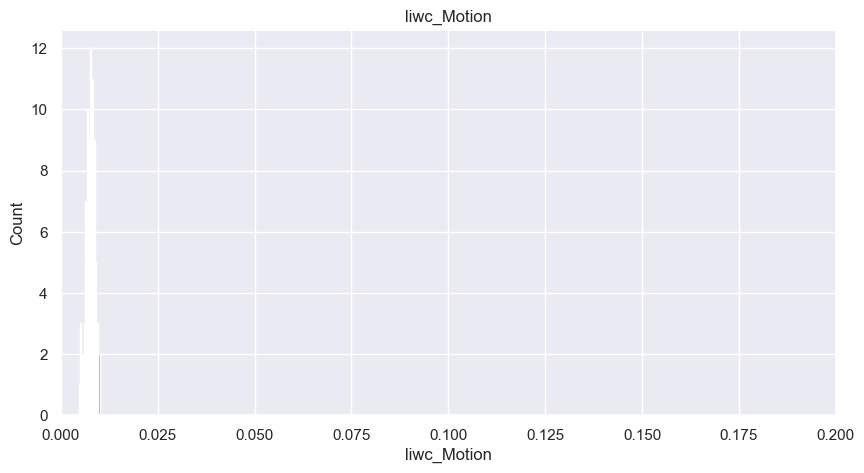

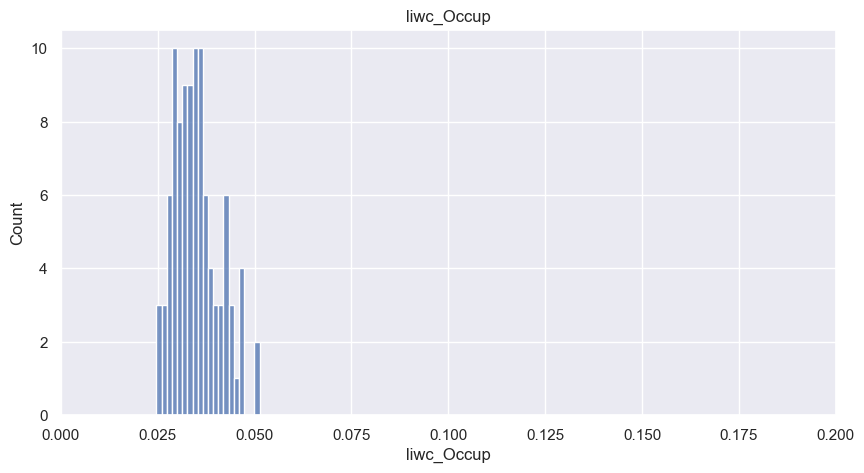

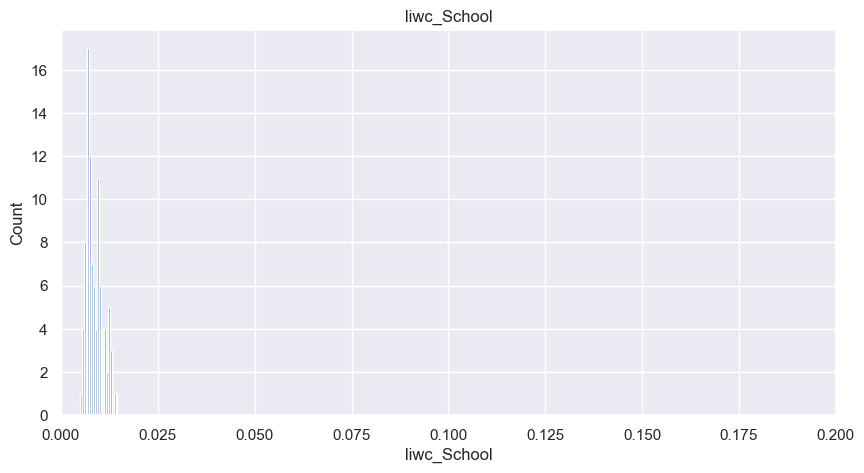

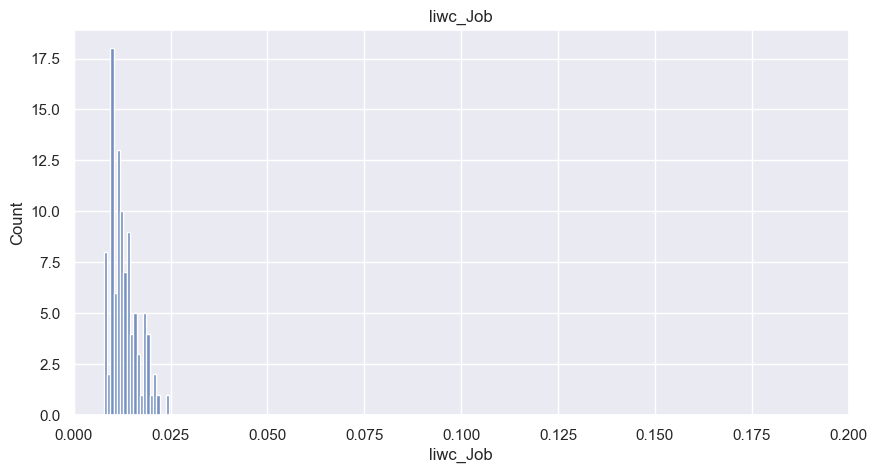

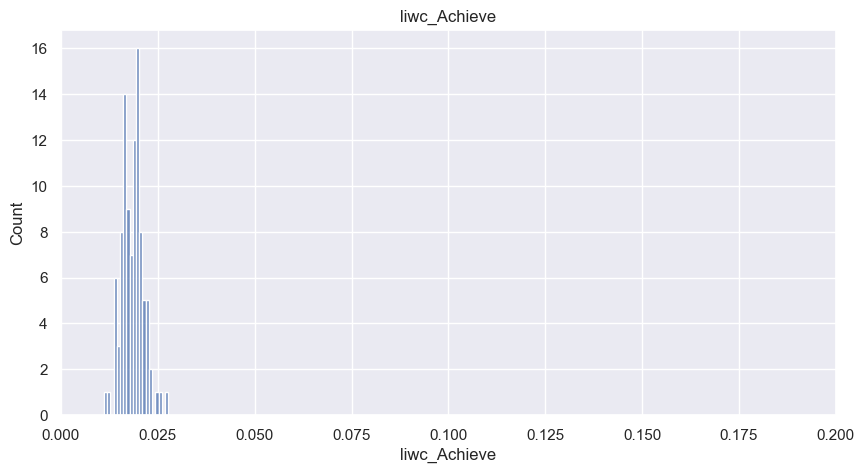

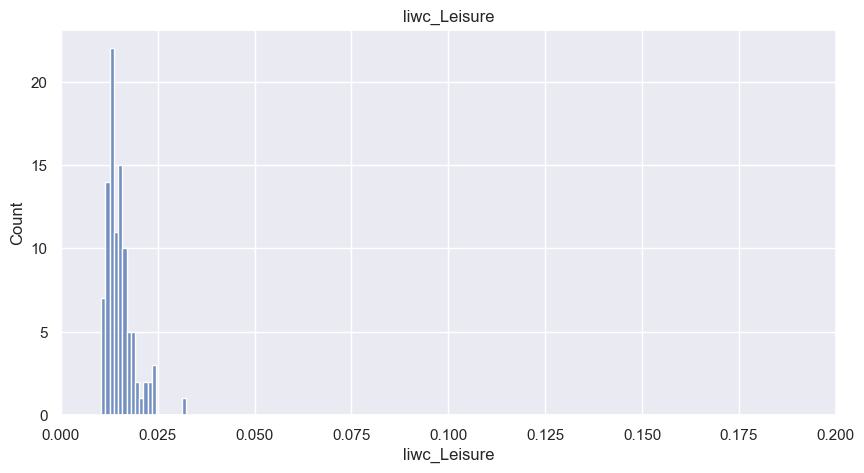

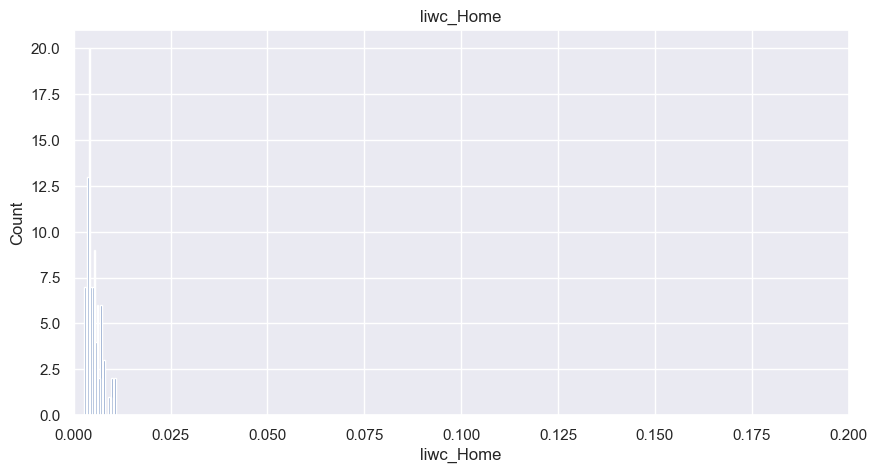

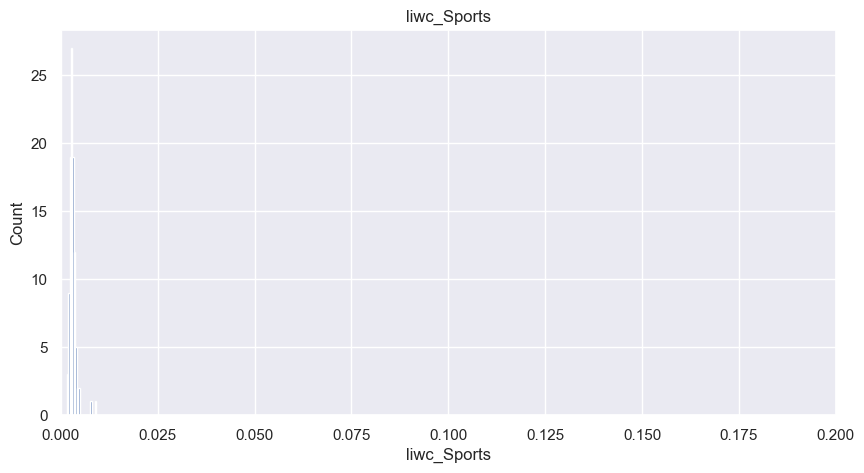

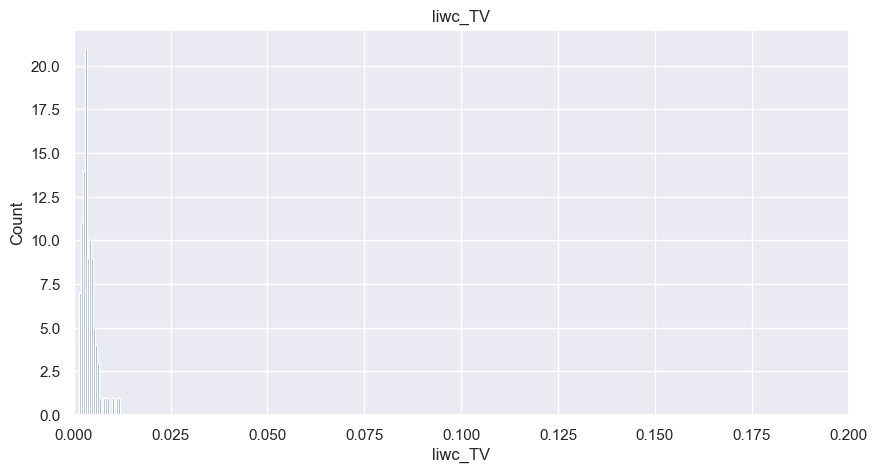

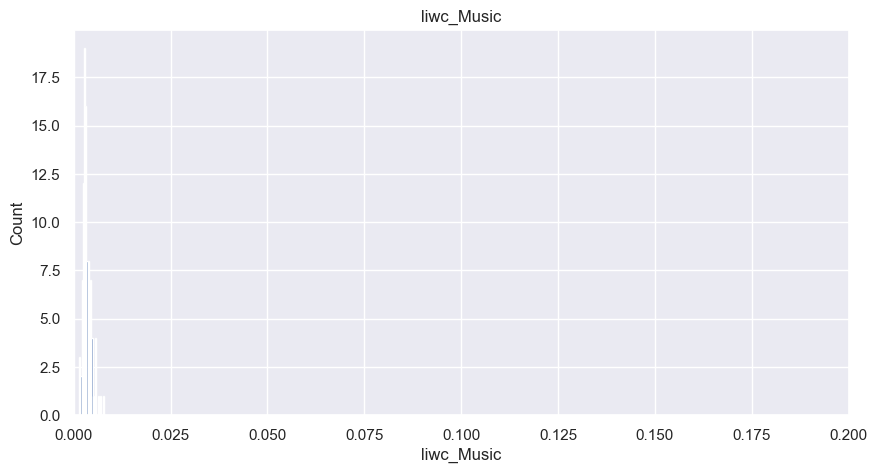

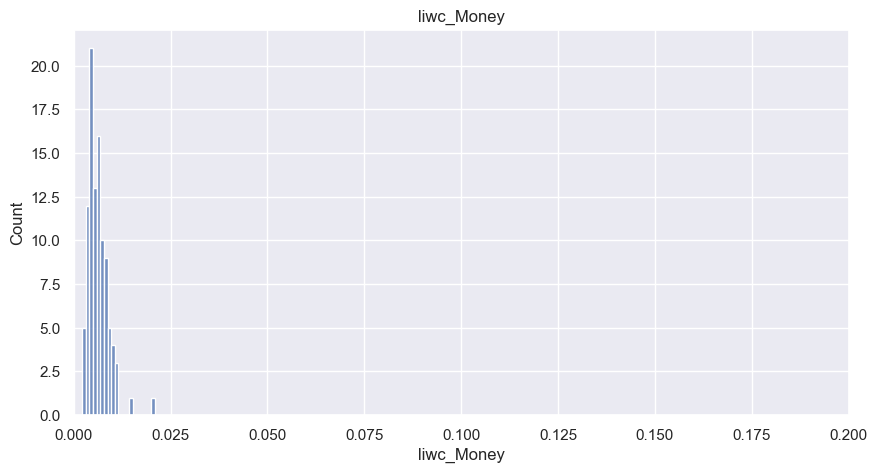

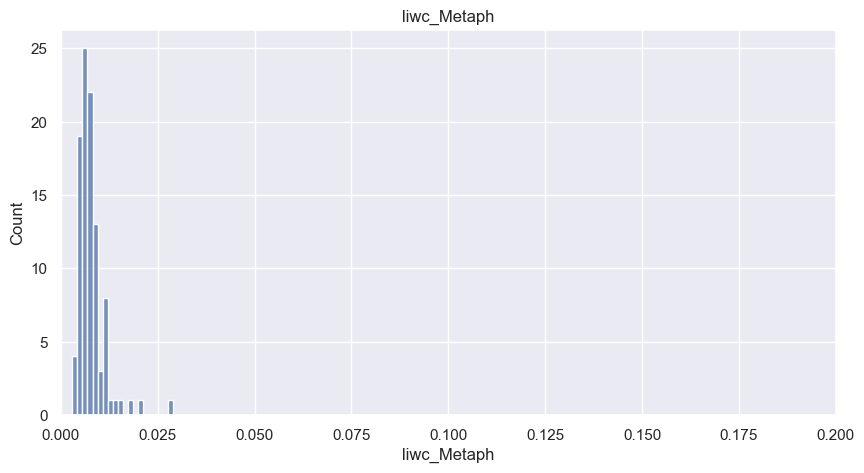

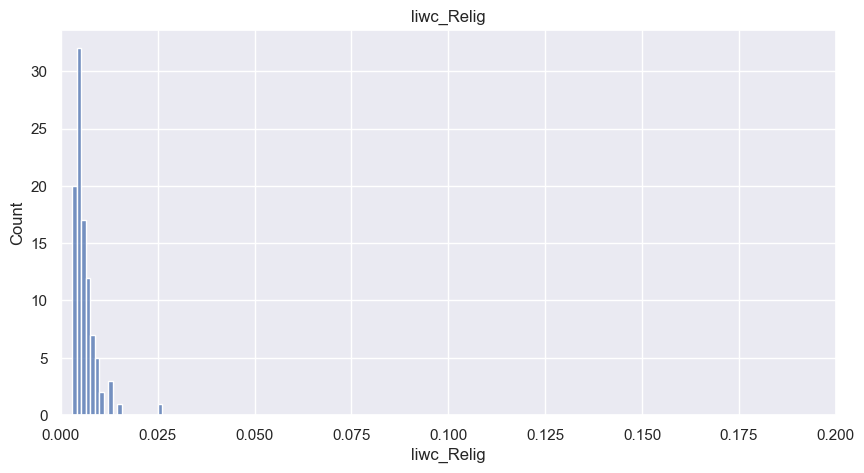

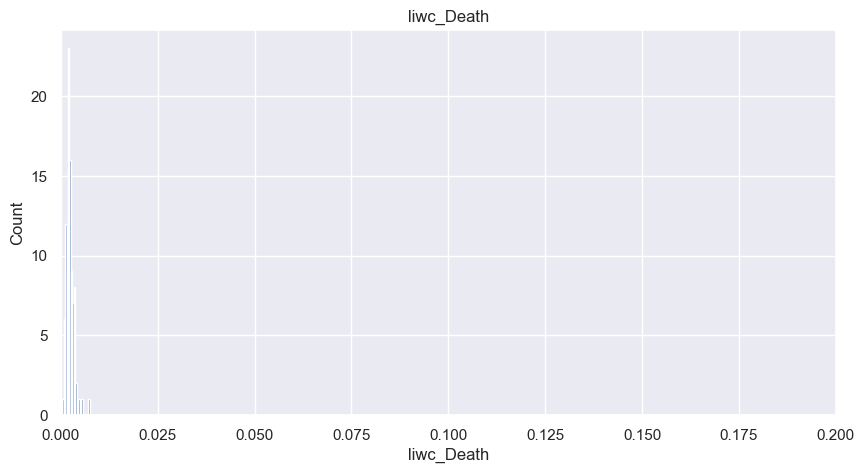

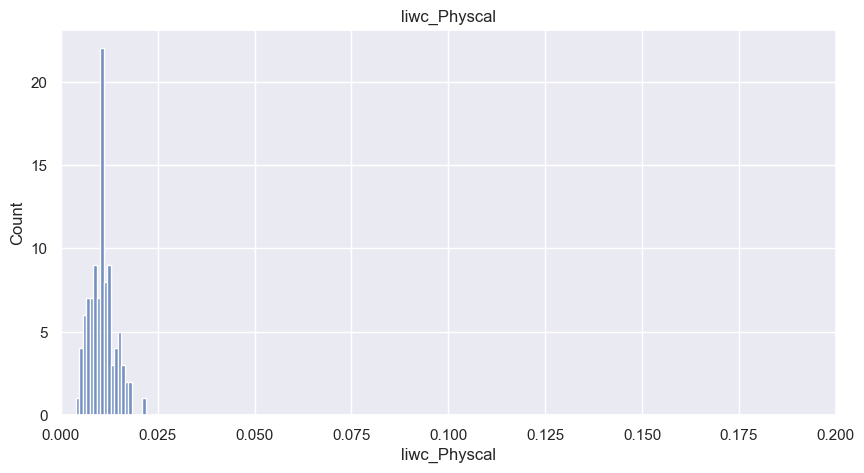

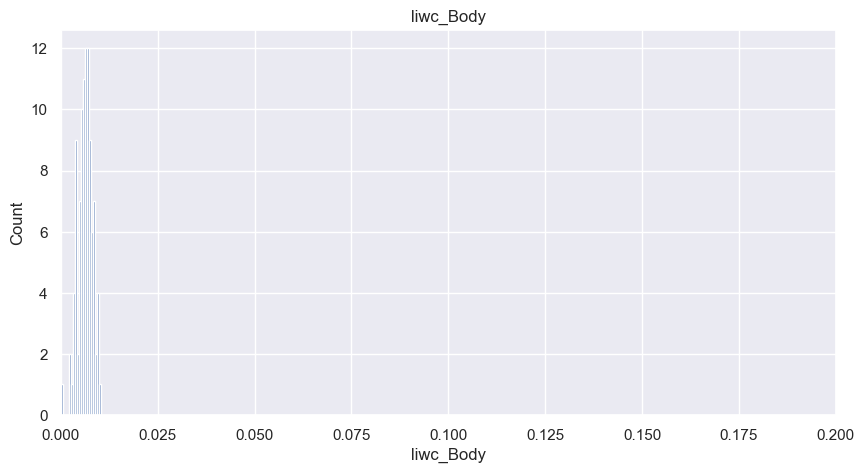

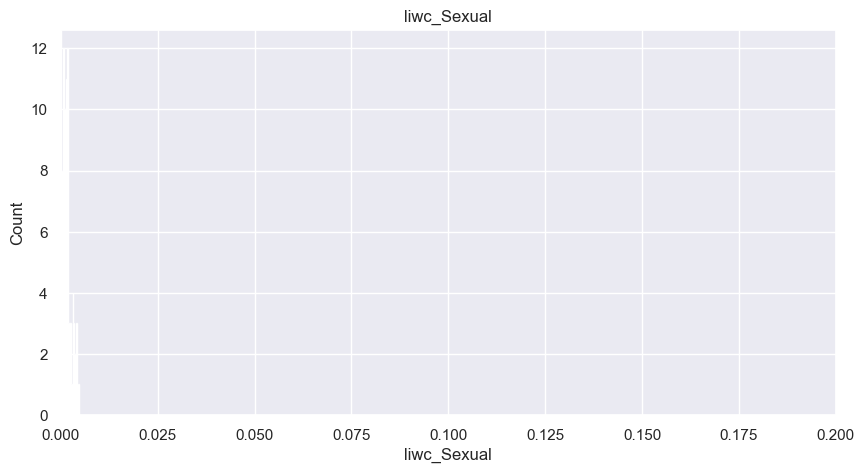

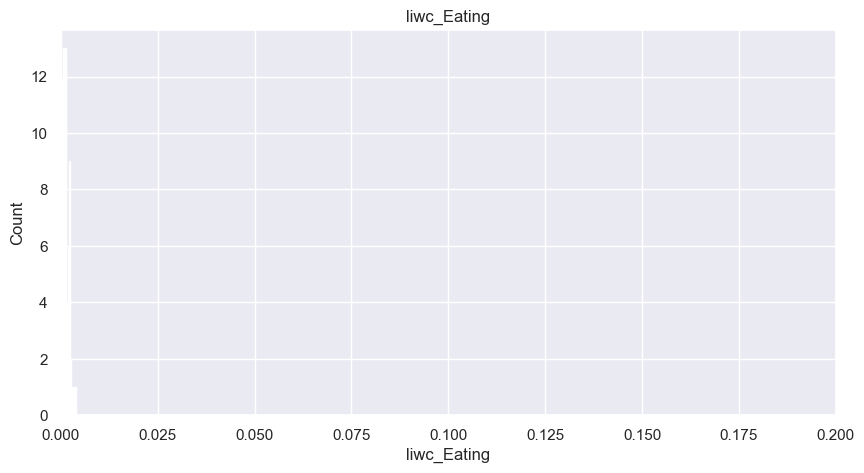

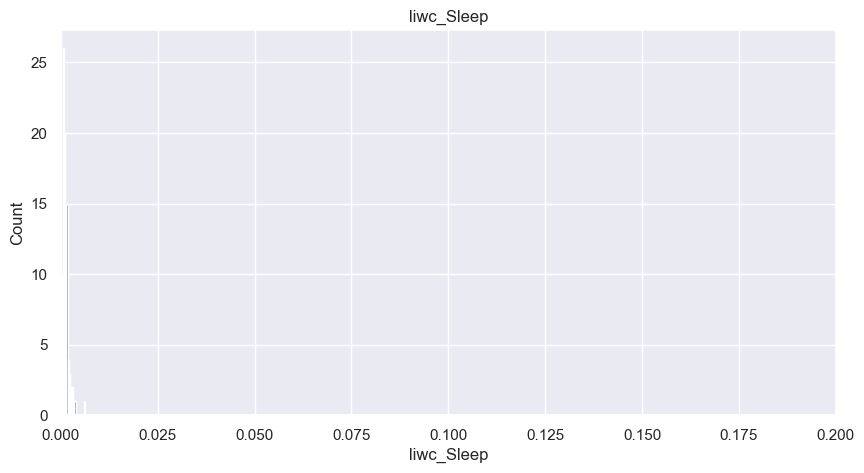

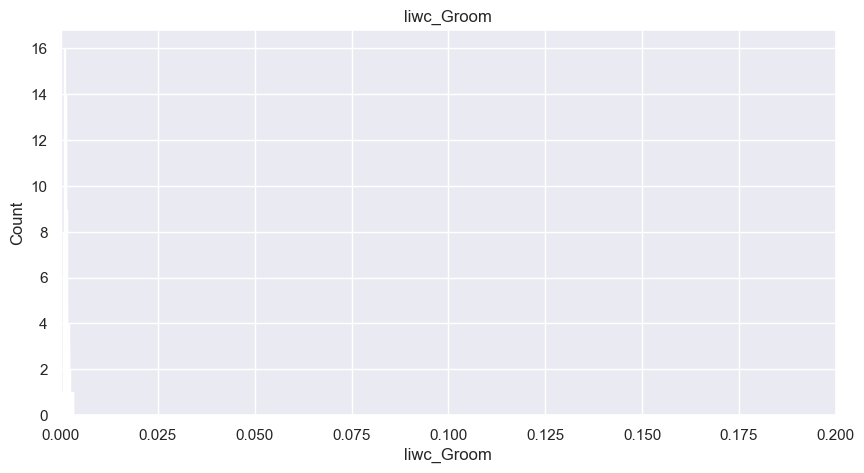

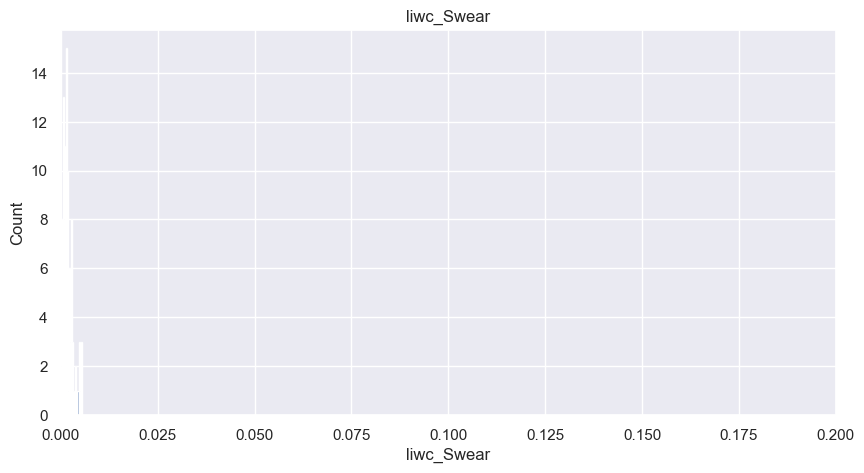

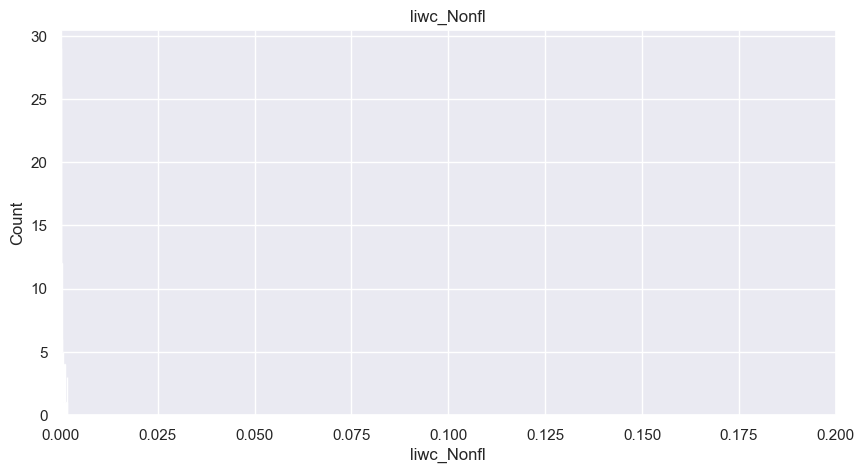

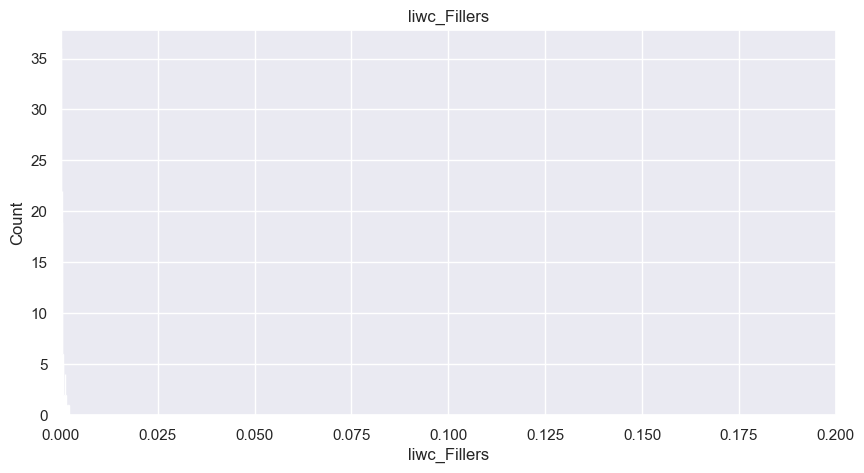

In [154]:
#histplot for distribution of all liwc categories
sns.set(rc={'figure.figsize':(10, 5)})
liwc_cols = liwc.columns[1:]
for col in liwc_cols:
    sns.histplot(grouped, x=col, bins = 20)
    plt.xlim(0, 0.2)
    plt.title(col)
    plt.show()

## Correlation Matrix of all Features

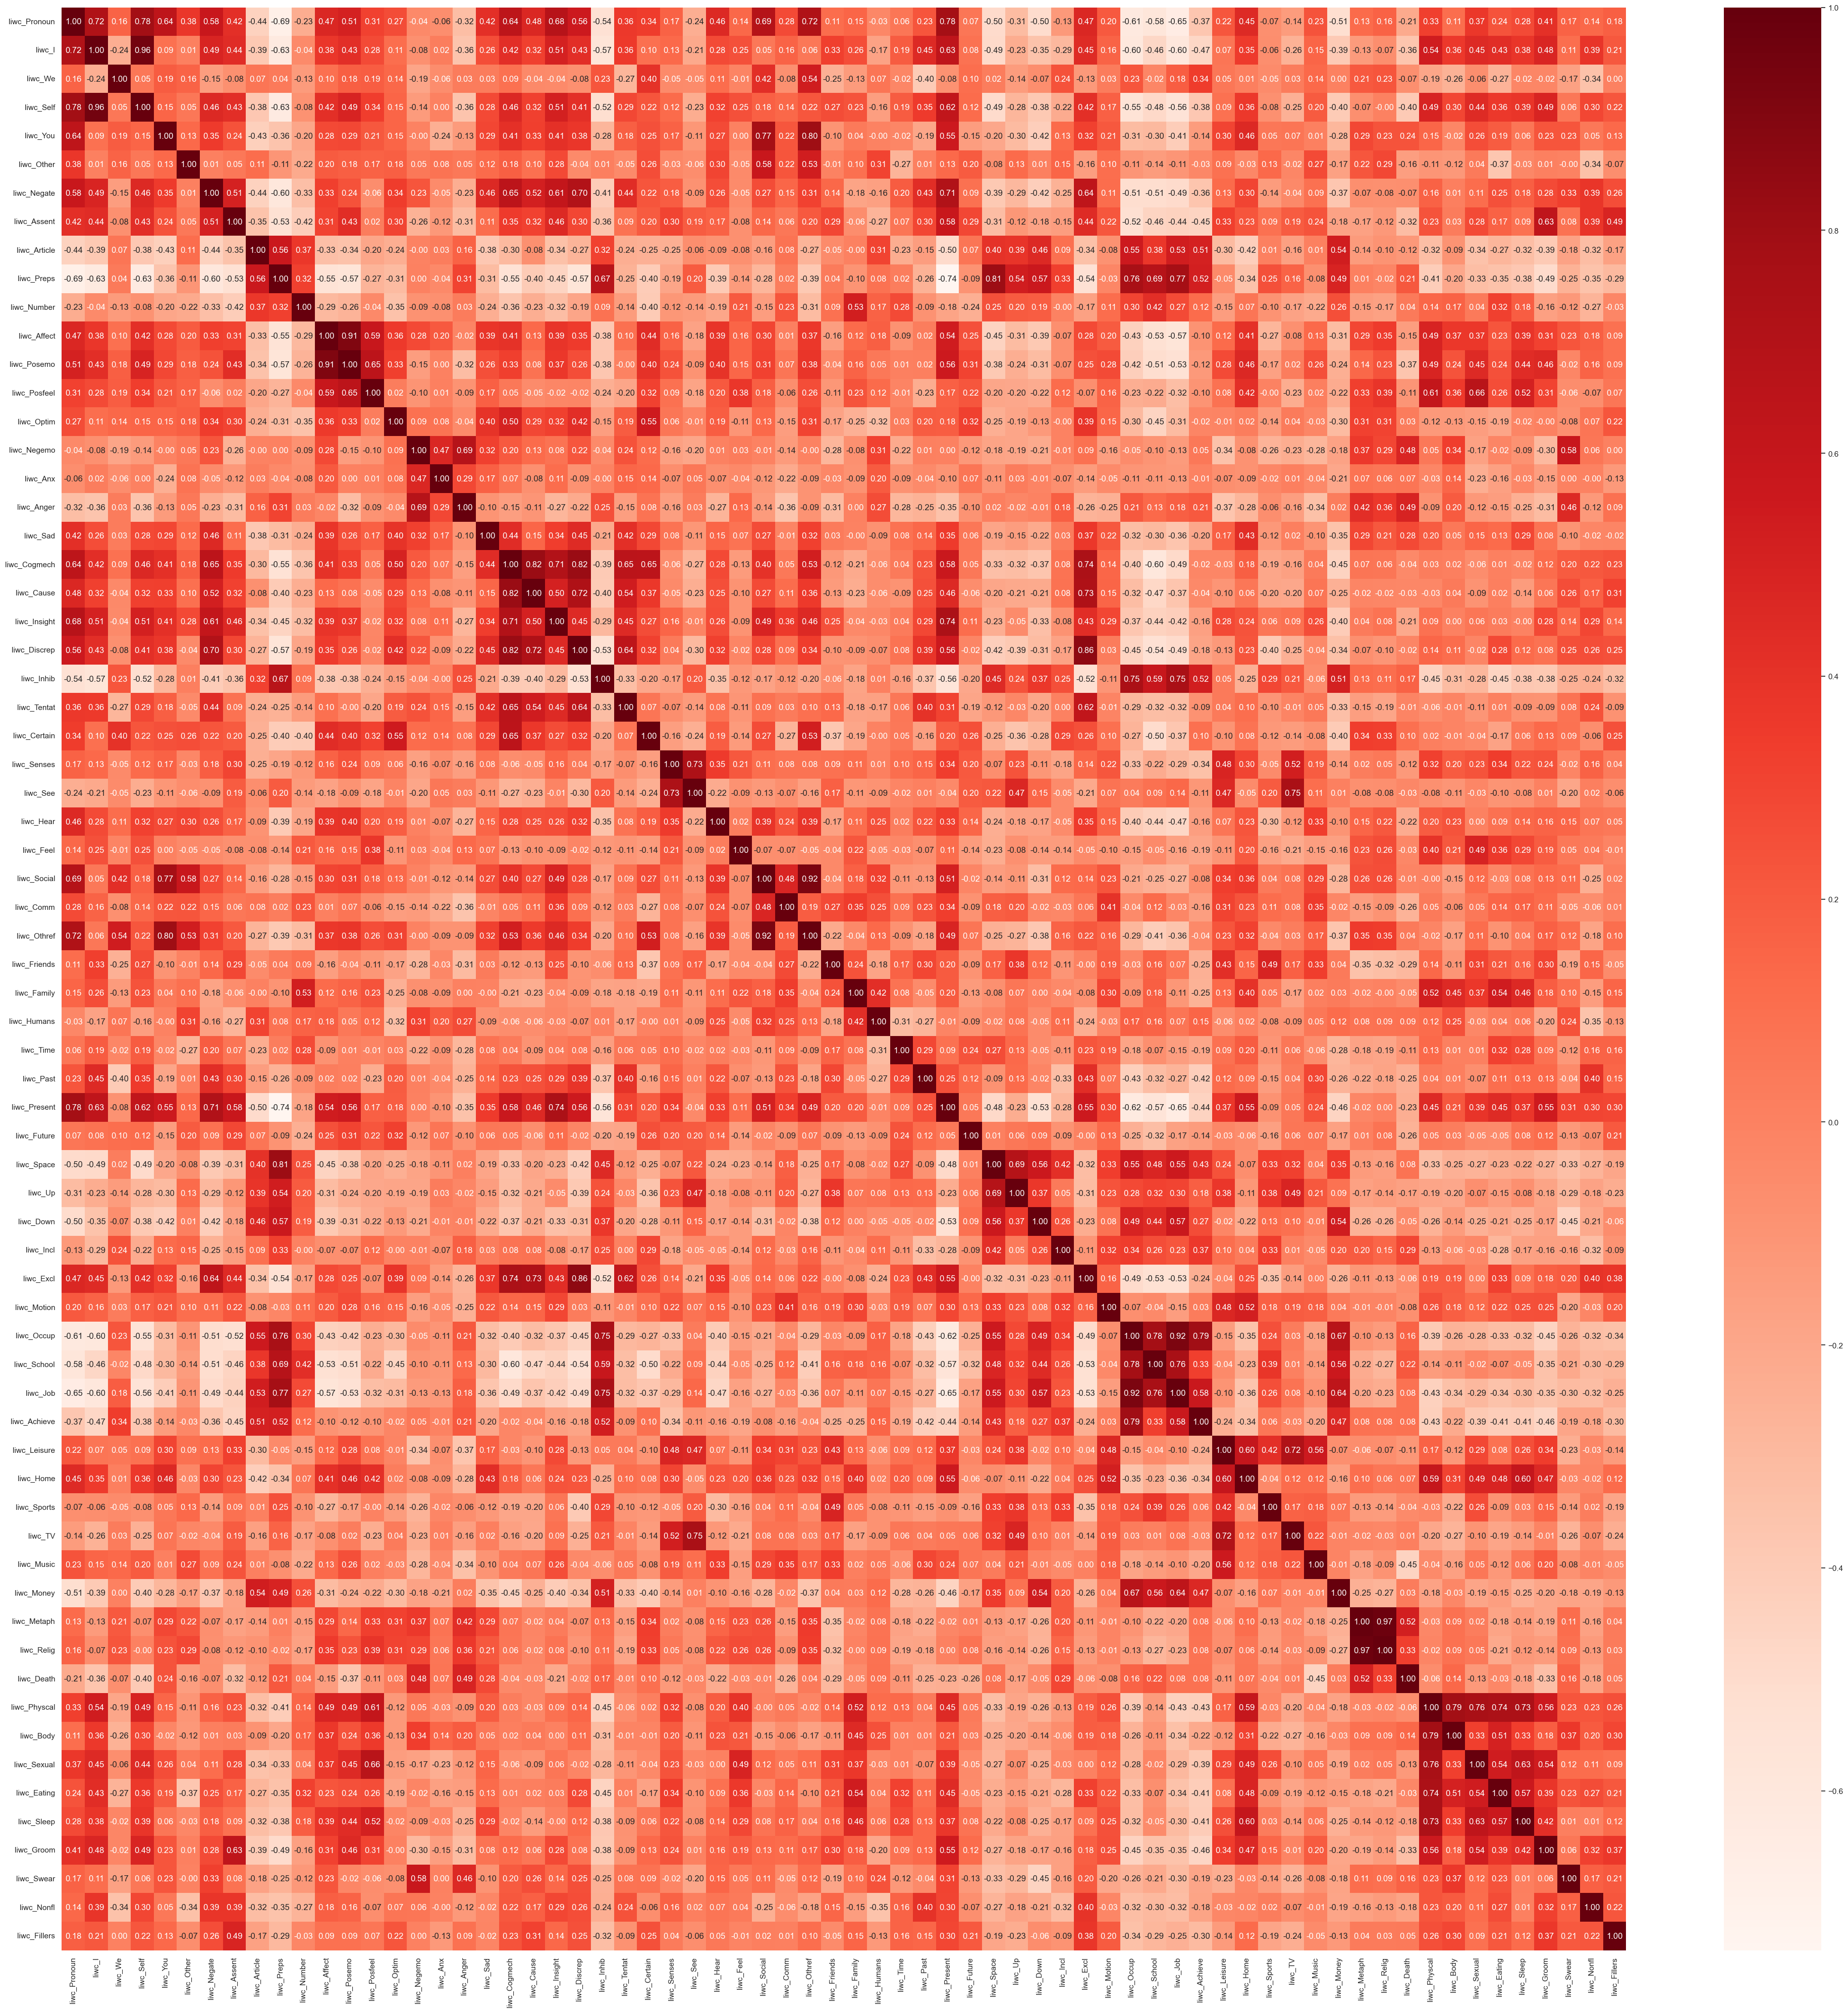

In [14]:
plt.figure(figsize=(50,50))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

## Highly Correlated Features

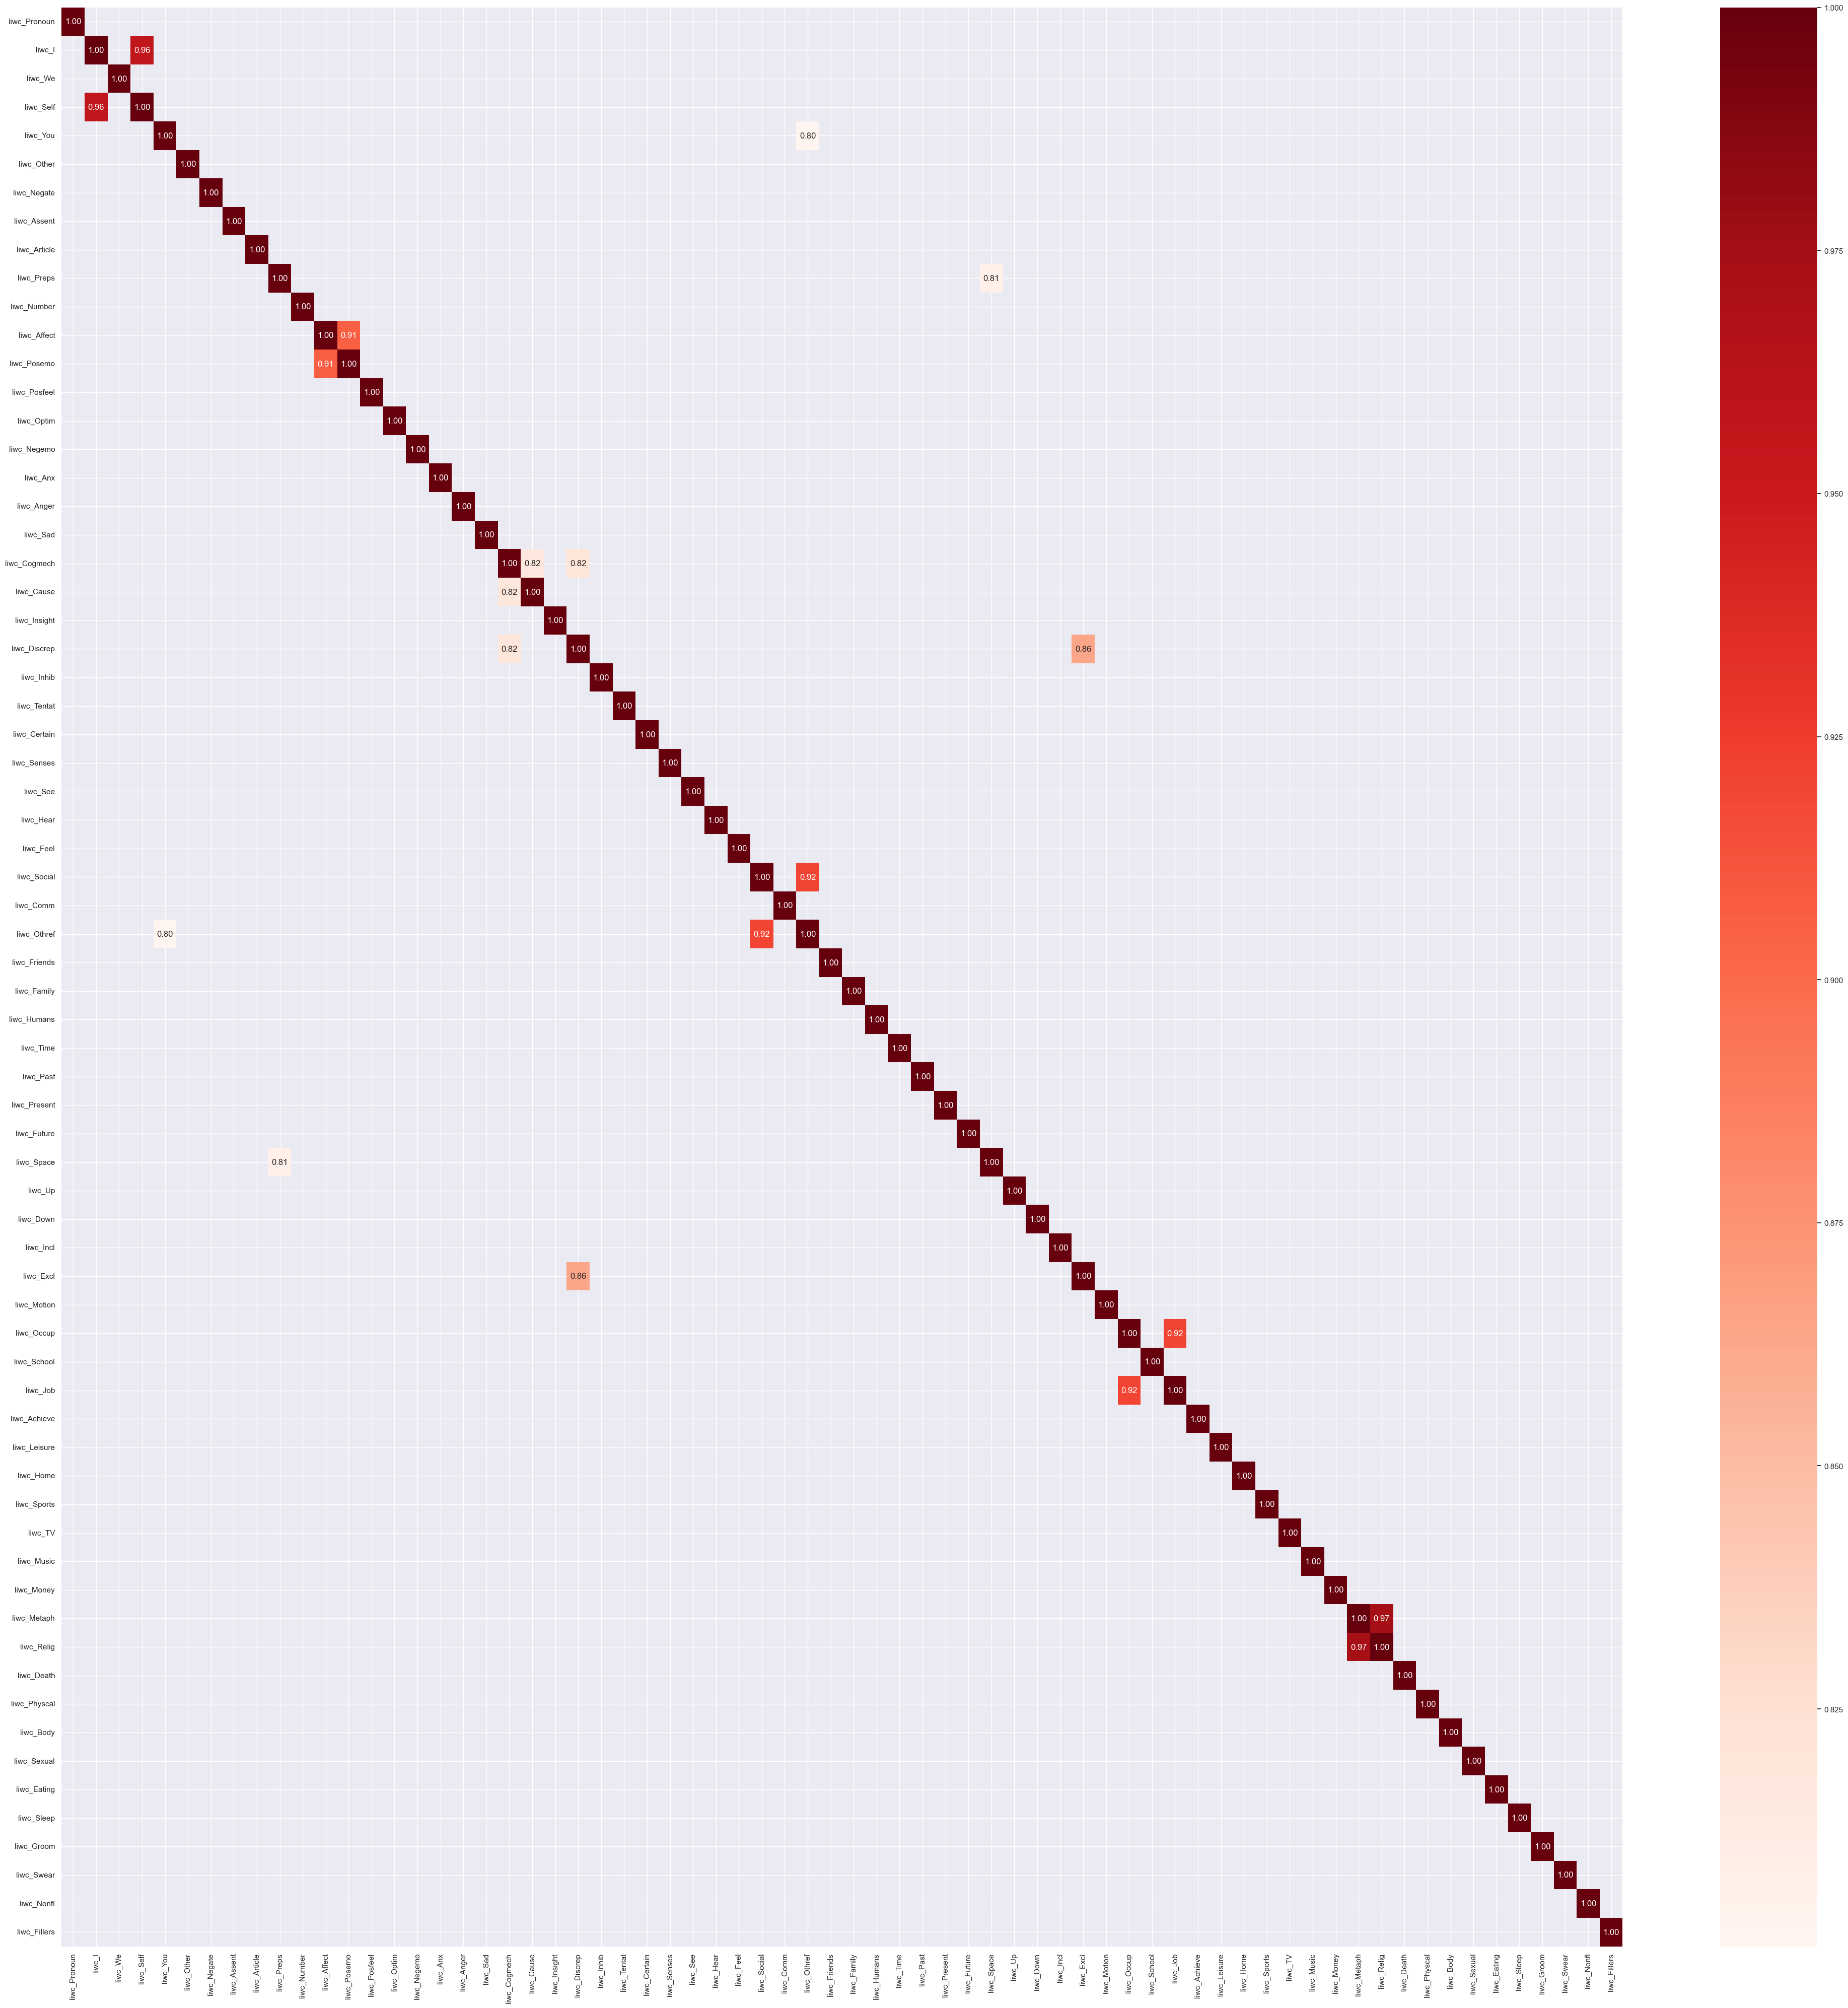

In [75]:
# in matrix, only show corrs over .8
high_corr = corr[abs(corr)>=.8]
plt.figure(figsize=(50,50))
sns.heatmap(high_corr, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [76]:
#print out pairs of highly correlated features incl their correlation
high_corr = high_corr.unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr!=1]
high_corr = high_corr.reset_index()
high_corr.columns = ['feature1', 'feature2', 'correlation']
high_corr = high_corr[high_corr['correlation'].notnull()]
high_corr[['feature1', 'feature2']] = np.sort(high_corr[['feature1', 'feature2']], axis=1)
high_corr = high_corr.drop_duplicates(subset=['feature1', 'feature2'])
high_corr

feature1      feature2  correlation
0    liwc_Metaph    liwc_Relig     0.974823
2         liwc_I     liwc_Self     0.956790
4    liwc_Othref   liwc_Social     0.920466
6       liwc_Job    liwc_Occup     0.920436
8    liwc_Affect   liwc_Posemo     0.906233
10  liwc_Discrep     liwc_Excl     0.863472
12  liwc_Cogmech  liwc_Discrep     0.818816
14    liwc_Cause  liwc_Cogmech     0.816732
16    liwc_Preps    liwc_Space     0.806753
18   liwc_Othref      liwc_You     0.800581

In [78]:
reason = ['Unknown Category', 'Overlapping Words', 'Subcategory', 'Unknown Category', 'Subcategory', 'Similar Words?', 'Subcategory', 'Subcategory', 'Similar Words?', 'Overlapping Words' ]
high_corr['reason'] = reason
high_corr.sort_values(by='reason', ascending=False)

feature1      feature2  correlation             reason
0    liwc_Metaph    liwc_Relig     0.974823   Unknown Category
6       liwc_Job    liwc_Occup     0.920436   Unknown Category
4    liwc_Othref   liwc_Social     0.920466        Subcategory
8    liwc_Affect   liwc_Posemo     0.906233        Subcategory
12  liwc_Cogmech  liwc_Discrep     0.818816        Subcategory
14    liwc_Cause  liwc_Cogmech     0.816732        Subcategory
10  liwc_Discrep     liwc_Excl     0.863472     Similar Words?
16    liwc_Preps    liwc_Space     0.806753     Similar Words?
2         liwc_I     liwc_Self     0.956790  Overlapping Words
18   liwc_Othref      liwc_You     0.800581  Overlapping Words

# LIWC Emotion Detection

In [150]:
for message in merged[merged['liwc_Negemo'] == 0]['final_message_string'].sample(100, random_state=42):
    print(message, '\n', '___' * 10, '\n')

Wieder die Grünen? Na klar....  
 ______________________________ 

Wahrnehmung: Wann unser Hirn versteckte Botschaften registriert - WELT  
 ______________________________ 

Londoner Freiheitsmarsch Piccadilly Circus 26. Juni 2021 https://www.youtube.com/watch?v=BsY7p82o3j0 Abonniere den Kanal  
 ______________________________ 

verarschen lassen von uniformierten oder auch zivilen Söldnern gehört aber nicht dazu  
 ______________________________ 

  
 ______________________________ 

Nochmal, es gibt keinen Grund hier nun zu hetzen. Es war nur ein bewusst machen!!! Es kann jeder das tun was er für richtig hält. Interessant sind aber einige der Reaktionen darauf  
 ______________________________ 

Gloria  
 ______________________________ 

Aber gut Desinformationen scheinen dir ja nahezuliegen  
 ______________________________ 

MARKmobil Aktuell - Razzia! (Boom Boom Boom) (hier in datenvolumenschonender Auflösung)  
 ______________________________ 

Ich hatte schon länger drauf gewart

# Checking Outlier Messages

In [133]:
liwc_dict = pd.read_csv('../data/liwc_german_2007.txt', sep = '\t', names=['word', 'category', 'category number'])

In [122]:
#filter out Negemo words
Negemo_word = liwc_dict[liwc_dict['category'] == 'Negemo']['word']
Negemo_word = [word.replace('*', '') for word in Negemo_word]

In [140]:
#message with max number of Negemo words
for message in data[data['UID_key'] == '2580143869444217863415830']['final_message']:
    words = message.split()
    for word in words:
        if word.lower() in Negemo_word:
            print(word)

UNTERBRECHEN
Angst
Schuld
SCHMERZ
SCHMERZEN
SCHMERZ
SCHMERZ
SCHMERZ
Schuld
SCHMERZ
SCHMERZEN
SCHMERZ
SCHMERZ
SCHMERZ
Schuld
SCHMERZ
SCHMERZEN
SCHMERZ
SCHMERZ
SCHMERZ
SCHMERZEN
SCHMERZ
SCHMERZ
SCHMERZ
SCHMERZEN
SCHMERZ
SCHMERZ
SCHMERZ
SCHMERZ
SCHMERZ
SCHMERZEN
SCHMERZ
SCHMERZ
SCHMERZ
SCHMERZEN
SCHMERZ
SCHMERZ
SCHMERZ
SCHMERZ
SCHMERZ
SCHMERZEN
SCHMERZ
SCHMERZ
SCHMERZ


In [135]:
#filter out Affect and Posemo words
Affect_Posemo_words = liwc_dict[(liwc_dict['category'] == 'Affect') | (liwc_dict['category'] == 'Posemo')]['word']
Affect_Posemo_words = [word.replace('*', '') for word in Affect_Posemo_words]

In [147]:
#message with max number of Affect and Posemo words
for message in data[data['UID_key'] == '101435-6408240263544091615']['final_message_string']:
    words = message.split()
    for word in words:
        if word.lower() in Affect_Posemo_words:
            print(word)

Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Danke
Dank

# Creating Sample for Comparison to GerVADER

In [162]:
negemo = merged[merged['liwc_Negemo'] != 0]
posemo = merged[merged['liwc_Posemo'] != 0]
print(f'{len(negemo)} messages with Negemo words and {len(posemo)} messages with Posemo words')

173304 messages with Negemo words and 281813 messages with Posemo words


In [163]:
neutral = merged[(merged['liwc_Negemo'] == 0) & (merged['liwc_Posemo'] == 0)].sample(200000, random_state=42)
vader = pd.concat([negemo, posemo, neutral])
vader['sentiment'] = ['negemo' if x != 0 else 'posemo' if y != 0 else 'neutral' for x, y in zip(vader['liwc_Negemo'], vader['liwc_Posemo'])]
vader = vader[['UID_key', 'sentiment', 'final_message']]

In [164]:
vader.head(5)

UID_key sentiment  \
4   209987-6408240263544091615    negemo   
13  210004-6408240263544091615    negemo   
20  210012-6408240263544091615    negemo   
43  210105-6408240263544091615    negemo   
47  210109-6408240263544091615    negemo   

                                        final_message  
4   "Der kleine Nerd" oder "mr scheisse einfach" I...  
13       Probleme erschaffen/aufzeigen   Lösen         
20       Probleme erschaffen/aufzeigen   Lösen         
43       Ich weiß dass du total unsicher bist.         
47  Du wirst immer wieder Probleme bekommen, wenn ...

In [165]:
vader.to_csv('../data/samples/vader_sample.tsv', index=False, sep='\t', header=False)

In [166]:
vader.sample(100, random_state=42).to_csv('../data/samples/vader_sample_100.tsv', index=False, sep='\t', header=False)

    GerVader was run on separate cloned repo.

In [186]:
neg_vader = pd.read_csv('../results/GerVader/GERVADER__negative.tsv', sep='\t', header=None)
positive_vader = pd.read_csv('../results/GerVader/GERVADER_positive.tsv', sep='\t', header=None)
neutral_vader = pd.read_csv('../results/GerVader/GERVADER__neutral.tsv', sep='\t', header=None)
vader_results= pd.concat([neg_vader, positive_vader, neutral_vader])

In [187]:
vader_results.columns = ['UID_key', 'final_message', 'liwc_sentiment', 'vader_score', 'vader', 'vader_sentiment']
vader_results = vader_results.drop(['vader_score', 'vader'], axis=1)

In [188]:
vader_results['liwc_sentiment'] = ['negative' if x == 'negemo' else 'positive' if x == 'posemo' else 'neutral' for x in vader_results['liwc_sentiment']]

In [190]:
#compare liwc and vader sentiment
len(vader_results[vader_results['liwc_sentiment'] != vader_results['vader_sentiment']])/len(vader_results)

0.3850090899793472

In [193]:
for id_ in vader_results[vader_results['liwc_sentiment'] != vader_results['vader_sentiment']]['UID_key'].sample(100, random_state=42):
    message = vader_results[vader_results['UID_key'] == id_]['final_message'].values[0]
    liwc_sent = vader_results[vader_results['UID_key'] == id_]['liwc_sentiment'].values[0]
    vader_sent = vader_results[vader_results['UID_key'] == id_]['vader_sentiment'].values[0]
    print(f'{message}\n\nLIWC: {liwc_sent}\nVADER: {vader_sent}\n', '___' * 10, '\n')

Das ist auch unwichtig. Es geht darum, dass die Elite sich von "dem überzähligen Nutzvieh" trennen muß, will sie die Weiden des Planeten nicht kahlfressen lassen ohne Profit daraus ziehen zu können. Deshalb muss es vor dem Schlachter in den Stall und zur Ruhe gebracht sein. dazu muss man die Herden teilen und die renitenten Tiere absondern.  seht es einfach aus deren Perspektive und alles liegt klar auf der Hand.       

LIWC: negative
VADER: positive
 ______________________________ 

Wenn der Empfänger weiß, dass er den Fang gemacht hat, scheut er sich nicht vor einer Überprüfung.  Wenn die Regisseurin einen guten Film macht, hat sie keine Angst vor den Kritikern.  Warum also haben Demokraten Angst vor einer Wahlprüfung?  Meine Antwort: Demokraten haben viele Leichen zu verstecken und würden gern ihr System in eine Neue Weltordnung formen. Global. Mit Klimawandel und dem ganzen Zeug.  <a href="https://t.me/Q_D_R_A">@Q_D_R_A</a>

LIWC: negative
VADER: positive
 ________________________

In [197]:
for UID in vader_results['UID_key'].sample(100, random_state=42):
    message = vader_results[vader_results['UID_key'] == UID]['final_message'].values
    vader = vader_results[vader_results['UID_key'] == UID]['vader_sentiment'].values
    print(f'{message}\n\nVADER: {vader}\n', '___' * 10, '\n')

['Möchtest du über deine Paranoia reden? Anscheinend denkst du, dass du und "deine Mitstreiter" von Regierungstrollen gestört werden sollen. Ich muss dich enttäuschen, dem Großteil der Bevölkerung gehst du und die anderen einfach am Hintern vorbei. Und Telegram ist halt Telegram. Draußen in der Realität bist du genau so ein Fliegenschiss wie alle anderen auch.       '
 'Möchtest du über deine Paranoia reden? Anscheinend denkst du, dass du und "deine Mitstreiter" von Regierungstrollen gestört werden sollen. Ich muss dich enttäuschen, dem Großteil der Bevölkerung gehst du und die anderen einfach am Hintern vorbei. Und Telegram ist halt Telegram. Draußen in der Realität bist du genau so ein Fliegenschiss wie alle anderen auch.       ']

VADER: ['positive' 'positive']
 ______________________________ 

['Das betrifft nicht "unsere" Regierung, sondern die fremdRegierung, die BRD       ']

VADER: ['neutral']
 ______________________________ 

['ging um katastrophenszenario der BRD schon 2008 a